<a href="https://colab.research.google.com/github/chandusayhi/Rossmann_Sales_Prediction_Capstone/blob/main/Chandrakant_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

<h1>Table of Contents</h1>
<div class=\"toc\"><ul class=\"toc-item\">
<li>1&nbsp;&nbsp;Introduction</li>
<li>2&nbsp;&nbsp;Importing Libraries &amp; Data</li>
<li>3&nbsp;&nbsp;Data Cleaning</li>
<li>4&nbsp;&nbsp;Adding missing value</li>
<li>5&nbsp;&nbsp;Exploratory Data Analyses &amp; Visualization</li>
<li>6&nbsp;&nbsp;Feature Engineering</li>
<li>7&nbsp;&nbsp;Model Development</li>
<li>8&nbsp;&nbsp;Prediction &amp; Validation</li>
<li>9&nbsp;&nbsp;Conclusion</li></ul></div>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

<h4>Rossman is Germany’s second largest drug store chain with more than
1115 stores across the country. Every month, the store manager needs to set targets for the sales team and design incentives for them. Currently, the managers set the targets based on their intuition of how much the sales are going to be in next month- which often leads to wrong target settings. Setting targets that are too high or unrealistic can lead to failure of the sales teams to meet the targets and therefore, loss of morale. On the other hand, setting targets that are very low will have costs in terms of lost opportunities/revenues.<h4>


####To forecast the daily sale of individual 1115 Rossmann stores located across Germany, 6 weeks in advance.
####Historical data upto 2 year 7 month is provided(Jan 2013 to July 2015)

<h1><b>Mounting Google Drive</b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1><b>Importing Libraries</b>

In [2]:
pip install inflection

In [6]:
# Importing the libraries
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import inflection
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from IPython.core.display  import HTML

<h4><b>Roseman Sales Dataset</b></h4>

This is a dataset of Roseman Stores. On analsysing this problem we observe that Roseman problem is a regression problem and our primarily goal is to predict the sales figures of Roseman problem. In this Notebook we work on following topics

* Analysing the Dataset by using Exploratory Data Analysis.
* Using Exponential Moving Averages analyse Trends and Seasonality in Roseman dataset.
* Analyse Regression analysis using following prediction analysis, 
  <ul>
  <li>Linear Regression Analysis 
  <li>Elastic Regression ( Lasso and Ridge Regression). 
  <li>Random Forest Regression. 
  <li>Extreme Gradiant Boosting Algorithm.

In [7]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.max_columns', None)
    
    sns.set()


In [8]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


<h1><b>Loading Data</b>

In [12]:
# Importing the store data as df_store_data and additional store dataset as df_ross_data
df_ross_data = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Supervised_ML_Regression/Data _ Resources/Rossmann Stores Data.csv", low_memory = False)
df_store_data = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Supervised_ML_Regression/Data _ Resources/store.csv", low_memory = False)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [13]:
# Let's see if the right table has imported or not.
df_store_data.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [14]:
# Let's see if the right table has imported or not.
df_ross_data.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [15]:
#merge two dataframe
df_raw = pd.merge(df_ross_data, df_store_data, how = 'left', on = 'Store')
df_raw.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


Data Cleansing in Roseman Dataset - We observe that Rosemann Data consists of two dataset details are 
* Store Dataset - This consists of all the information about various stores types. We observe that there are four categories of stores in Roseman Dataset, we will analyse store wise performance of dataset in detail.

* Rosemann Dataset (train.csv) - This is a complete dataset of all the detailed information about sales in various stores.

We observe that Rosemann store dataset has around 10 Lakhs records means it is a huge dataset. We have to join both the datasets i.e. Rosemann and Store and clean them. One important thing is that we reduce the datatype to int32 instead of int64 in order to improve performance of our dataset.

Since we are using sklearn and numeric values are prereuqisite and mandatory requirement for different models, so we ensure that all the columns have int32 values.

Here we have two data frame first one is df_store_data which has the sales values and second one is the df_ross_data which has all the additional information about stores.

If we observe we find that both column has "Store" column which contains a unique store id, so to get all data in a single dataframe we have to merge these two tables on that key "Store".

<h1><b>Data Description</b>

In [16]:
#Getting the details about columns 
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [17]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

<h1><b>Rename Columns</b>

In [18]:
#Renaming the columns names
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))
df_raw.columns = cols_new
df_raw.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

In data frame "df_raw" we have our final data to be processed further. Before doing all modifications let's make a copy of data so that or original data would be preserved.

In [20]:
#Creading the copy of the dataframe in order to maintain the original data
df = df_raw.copy()

<h1><b>Data Dimensions</b>

In [21]:
#Printing the details of rows and columns 
print( 'Number of Rows {}'.format(df.shape[0]))
print( 'Number of Columns {}'.format(df.shape[1]))

Number of Rows 1017209
Number of Columns 18


In [22]:
#Finding the sales count
df[df.open == 0].sales.value_counts()

0    172817
Name: sales, dtype: int64

<h1><b>Data Types</b>

In [23]:
df.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [24]:
# changing date to datetime type
df['date'] = pd.to_datetime(df['date'])
df.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

In [25]:
#Function to split the date into year, month, day and week of year
def split_date(df):
  df['date'] = pd.to_datetime(df['date'])
  df['Year'] = df.date.dt.year
  df['Month'] = df.date.dt.month
  df['Day'] = df.date.dt.day
  df['WeekOfYear'] = df.date.dt.isocalendar().week

In [26]:
#Calling the Split functions
split_date(df)

In [28]:
#Printing the Dataframe
df.head(3)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31


In [29]:
#Retrieving the information about the dataframe
print("#################################################### DATA INFROMATION ##############################################################################")
print()
print(df.info())
df['date'] = pd.to_datetime(df['date'])

#################################################### DATA INFROMATION ##############################################################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   store                         1017209 non-null  int64         
 1   day_of_week                   1017209 non-null  int64         
 2   date                          1017209 non-null  datetime64[ns]
 3   sales                         1017209 non-null  int64         
 4   customers                     1017209 non-null  int64         
 5   open                          1017209 non-null  int64         
 6   promo                         1017209 non-null  int64         
 7   state_holiday                 1017209 non-null  object        
 8   school_holiday                1017209 non-null  int6


<h1><b>Filling Missing Values and Removing Outliers</b></h1>
Few columns have high number of missing values, so we need to fill them with appropriate method for better result.
<ul>
<li><b>competition_distance</b>

Shows distance in meters to nearest competitor store. If a value is null, it should mean that there are no near competitors.
<li>
<b>competition_opensince[month/year]</b>

Gives the approximate year and month of the time the nearest competitor was opened. 

<li><b>promo2[year/week]</b>

Describes the year and calendar week when the store started participating in promo2, which is a continuing and consecutive promotion for some stores. 
<li><b>
promo_interval</b>

Describes the consecutive intervals promo2 is started, naming months the promotion is started a new. E.g. "Feb, May, Aug, Nov" means each round starts in February, May, August, November of any given year for that store. 
</ul>
<b>Approach</b>

1: promo2 tells us wheather store is in pomotion or not and here the 0 count is 58031 which is same as the null values in promo_interval , promo2_since_year and promo2_since_week columns and that is obvious. The null values in Column promo2_since_week, promo2_since_year, promo_interval is due to promo is 0 for those stores. So we would fill all the null values in these columns with 0.

2: Since competition_distance for 3 stores isn't given so we could fill it with mean of the distance given for all other stores

3: competition_open_since_month, competition_open_since_month can be filled using the most occuring month and year respectively.

In [30]:
#Displaying missing values and percentage of missing values
perc_missing_data = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T.sort_values(1,ascending=False)
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
promo_interval,508031.0,49.943620
promo2_since_year,508031.0,49.943620
promo2_since_week,508031.0,49.943620
competition_open_since_year,323348.0,31.787764
competition_open_since_month,323348.0,31.787764
competition_distance,2642.0,0.259730
day_of_week,0.0,0.000000
Day,0.0,0.000000
Month,0.0,0.000000
Year,0.0,0.000000


In [41]:
# competition_distance
df['competition_distance'].fillna(200000, inplace = True)

# competition_open_since_month
df['competition_open_since_month'].fillna(df['date'].dt.month, inplace = True)

# competition_open_since_year
df['competition_open_since_year'].fillna(df['date'].dt.year, inplace = True)

# promo2_since_week
df['promo2_since_week'].fillna(df['date'].dt.isocalendar().week, inplace = True)

# promo2_since_year
df['promo2_since_year'].fillna(df['date'].dt.year, inplace = True)

# promo_interval -> is_promo
month_map = {1 : 'Jan', 2 : 'Fev', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 
 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'}

df['promo_interval'].fillna(0, inplace = True)

df['month_map'] = df['date'].dt.month.map( month_map )

df['is_promo'] = df[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )

In [42]:
#Displaying missing values and percentage of missing values
perc_missing_data = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T.sort_values(1,ascending=False)
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
store,0.0,0.0
day_of_week,0.0,0.0
month_map,0.0,0.0
WeekOfYear,0.0,0.0
Day,0.0,0.0
Month,0.0,0.0
Year,0.0,0.0
promo_interval,0.0,0.0
promo2_since_year,0.0,0.0
promo2_since_week,0.0,0.0


<h1><b>Change Data Types</b>

In [43]:
# competition
df['competition_open_since_month'] = df['competition_open_since_month'].astype("int64")
df['competition_open_since_year'] = df['competition_open_since_year'].astype("int64")

# promo
df['promo2_since_week'] = df['promo2_since_week'].astype("int64")
df['promo2_since_year'] = df['promo2_since_year'].astype("int64")

<h1><b>Descriptive Statistical</b>

A quick overview in numerical and categorical attributes.

In [44]:
num_attributes = df.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

<h1><b>Numerical Attributes</b>
<ul>
<li>Central tendency
<ul style="list-style-type:square;">
<li>mean
<li>median
</ul>
<li>Dispersion
<ul><li>std - standard deviation
<li>min
<li>max
<li>range
<li>skew
<ul><li>skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean</ul>
<li>kurtosis
<ul><li>measure of the "tailedness" of the probability distribution of a real-valued random variable

In [45]:
#Central Tendency - Mean, Median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#Dispersion - Std, Min, Max, Range, Skew, Kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ["Attribute", "Min", "Max", "Range", "Mean", "Median", "Std", "Skew", "Kurtosis"]
m


,Attribute,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


Evaluating "sales" column:
<ul>
<li>Min = 0, means that on that day the store was closed.
<li>Max = 41551
<li>Range = 451151 - 0
<li>Mean = It tells us that on average, 5773 sales are made per day.
<li>Median = Median very close to the average
<li>Std = Tell us that our sales may vary by +/- 3849, that is, there are days that total sales are (5773 + 3849) and there are days that total sales are (5773 - 3849)
<li>Skew = Positive and near to 0, slightly concentrated on the left side
<li>Kurtosis = Positive value, indicating that data is more concentrated next to the mean

<h1><b>Categorical Attributes</b>

Boxplot
<ul>
<li>Shows quantiles (25%, 50%, 75%)
<li>Max value = Q3 + 1.5 * IQ, where IQ = Q3 - Q1
<li>Min value = Q1 - 1.5 * IQ, where IQ = Q3 - Q1
</ul>

Every data point above the max value or under the min value represents a outlier.

In [46]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
WeekOfYear        52
month_map         12
dtype: int64

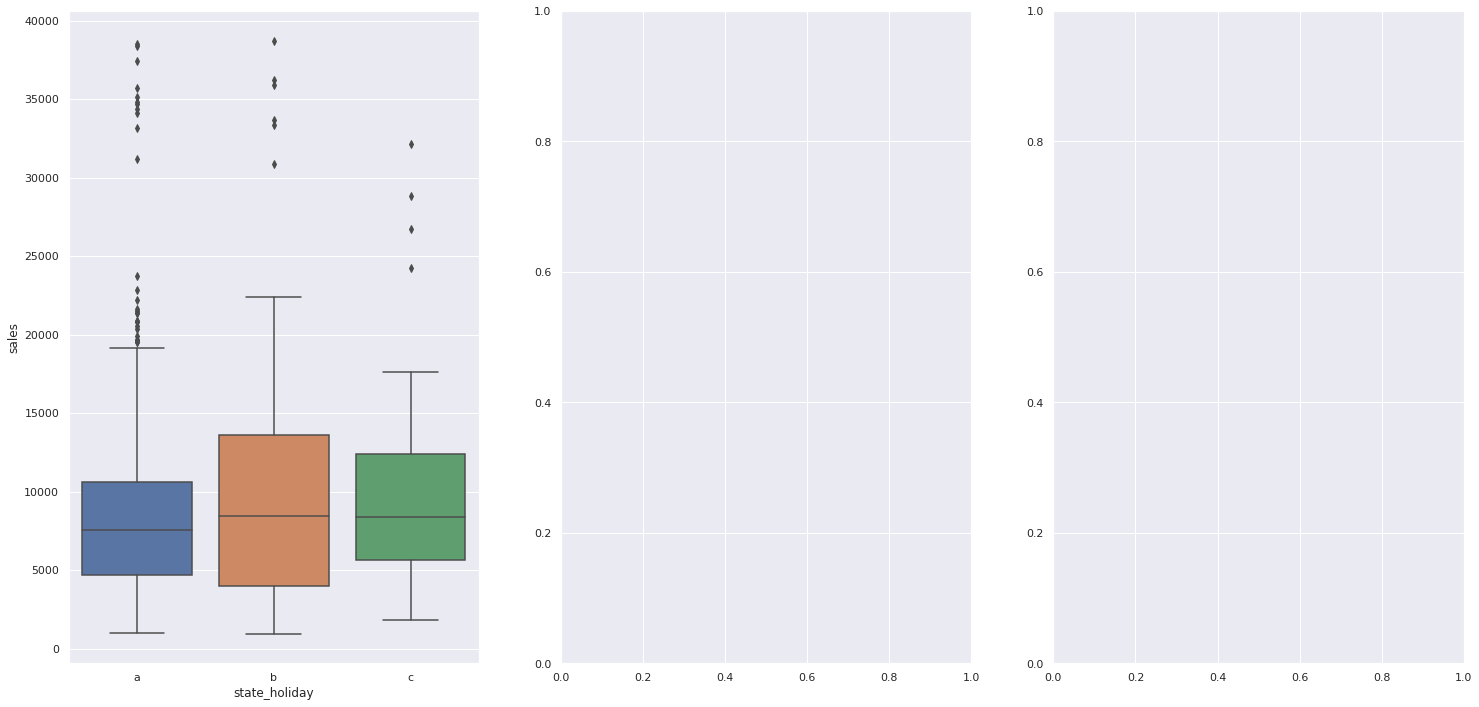

In [49]:
# boxplot
aux1 = df[(df['state_holiday'] != '0') & (df['sales'] > 0 )]

fig, axes = plt.subplots(1, 3)
_ = sns.boxplot(x = 'state_holiday', y = 'sales', data = aux1, ax = axes[0])

_ = plt.subplot(1,3,2)
_ = sns.boxplot(x = 'store_type',y = 'sales', data = aux1, ax = axes[1])

_ = plt.subplot(1,3,3)
_ = sns.boxplot(x = 'assortment', y = 'sales', data = aux1, ax = axes[2])

Some inferences from the data:

<ul>
<li>state_holiday -> Holiday "b" has a median higher than "a" but very similar to "c".
<li>store_type ->  type of store "b" has a lot more outliers and a larger amount of sales. Store "b" has a very large amount of data around the median. "a" and "d" have a similar dispersion around the median.
<li>assortment  "b" has more sales compared to other types of assortment
</ul>

In [52]:
df.describe()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,Year,Month,Day,WeekOfYear,is_promo
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.935443e+03,6.786849e+00,2.010325e+03,5.005638e-01,2.361903e+01,2.012793e+03,2.013832e+03,5.846762e+00,1.570279e+01,2.361551e+01,1.552306e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,1.254765e+04,3.311087e+00,5.515593e+00,4.999999e-01,1.431006e+01,1.662658e+00,7.773960e-01,3.326097e+00,8.787638e+00,1.443338e+01,3.621246e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,1.000000e+00,2.009000e+03,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000e+00,2.008000e+03,0.000000e+00,1.200000e+01,2.012000e+03,2.013000e+03,3.000000e+00,8.000000e+00,1.100000e+01,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,7.000000e+00,2.012000e+03,1.000000e+00,2.200000e+01,2.013000e+03,2.014000e+03,6.000000e+00,1.600000e+01,2.200000e+01,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.910000e+03,1.000000e+01,2.014000e+03,1.000000e+00,3.700000e+01,2.014000e+03,2.014000e+03,8.000000e+00,2.300000e+01,3.500000e+01,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+05,1.200000e+01,2.015000e+03,1.000000e+00,5.200000e+01,2.015000e+03,2.015000e+03,1.200000e+01,3.100000e+01,5.200000e+01,1.000000e+00


<h1><b>NUMERICAL VARIABLES</b>

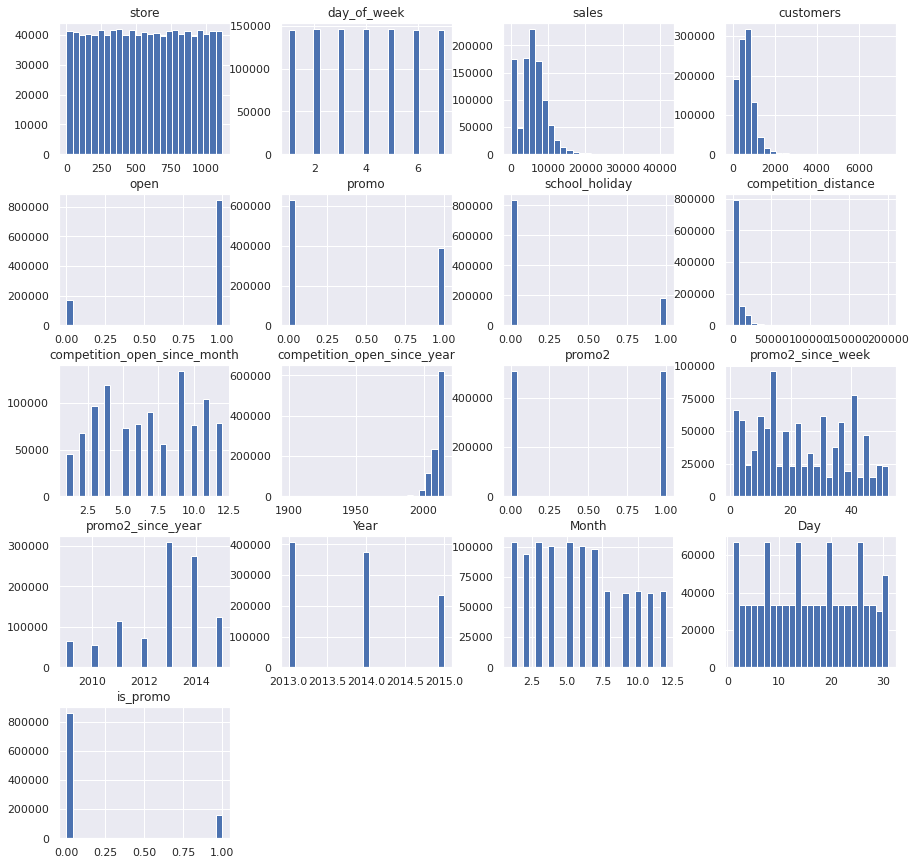

In [53]:
num_attributes.hist(figsize=(15, 15), bins=25);

From the graphs above, we can get some conclusions:

* **competition_distance** \\(\rightarrow\\) bigger concentrations in smaller intervals. So, there's a lot of close competitors.

* **competition_open_since_month** \\(\rightarrow\\) has an increase until the fourth month and reaches the maximum. From that there is a fall. Therefore, this feature has a certain variation.

* **day_of_week** \\(\rightarrow\\) there is no variation, so, the day of the week will not influence sales. There is no variation.

* **is_promo** \\(\rightarrow\\) there are a lot more sales when there are no promotions. This can be an insight, we will check soon.

* **promo2_since_year** \\(\rightarrow\\) there is a very high peak in 2013, we need to check what happened that year.

<h1><b>CATEGORICAL VARIABLES</b>

In [54]:
df.select_dtypes(include = 'object').columns

Index(['state_holiday', 'store_type', 'assortment', 'promo_interval',
       'month_map'],
      dtype='object')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


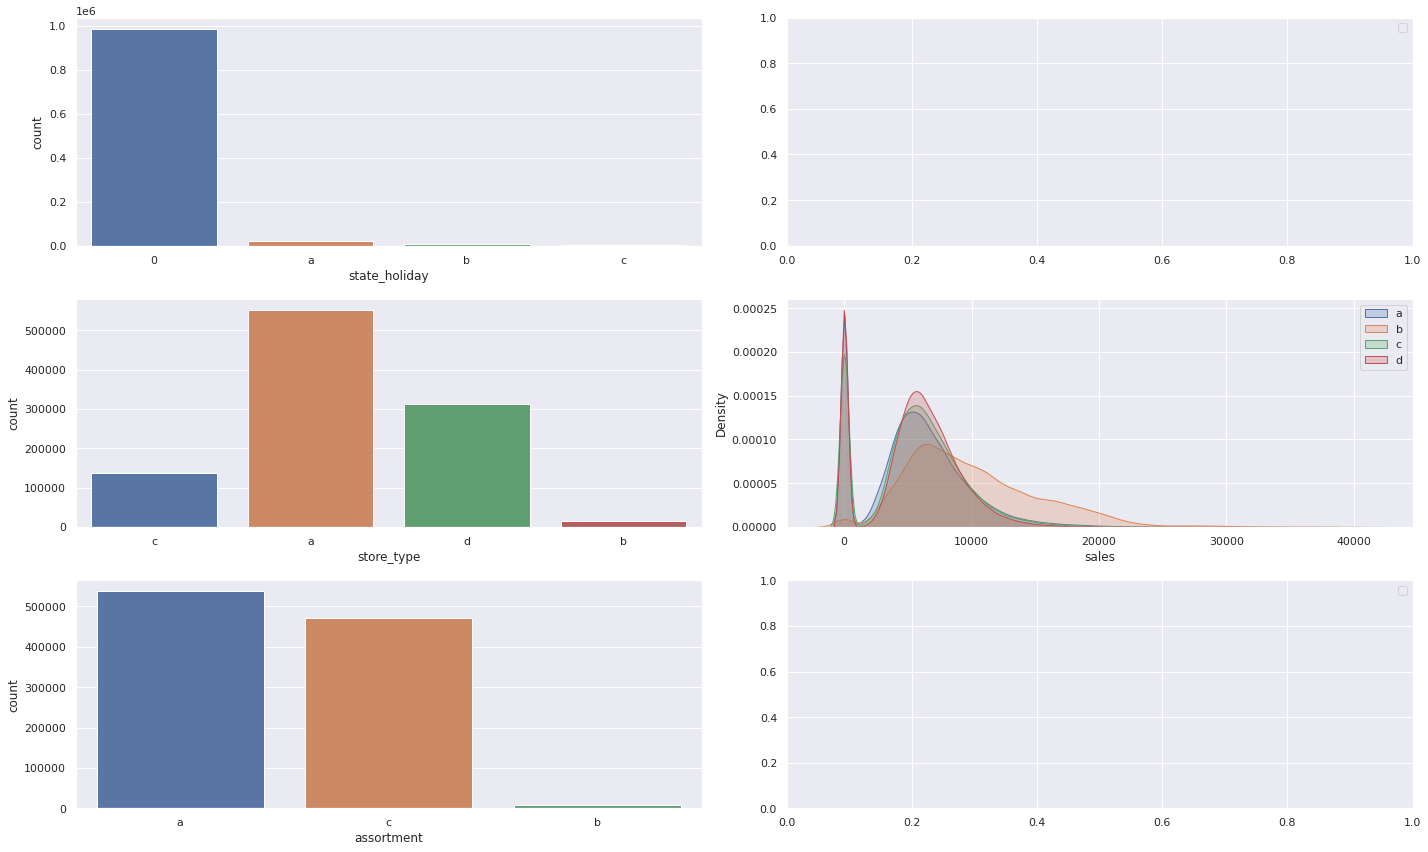

In [55]:
fig, axes = plt.subplots(3,2, figsize  = (20,12))

#state_holiday
a = df[df['state_holiday'] != 'regular_day']

sns.countplot(x = a['state_holiday'], ax = axes[0][0])

sns.kdeplot(x = df[df['state_holiday'] == 'public_holiday']['sales'],label = 'public_holiday',shade = True, ax = axes[0][1])
sns.kdeplot(x = df[df['state_holiday'] == 'easter_holiday']['sales'],label = 'easter_holiday',shade = True, ax = axes[0][1])
sns.kdeplot(x = df[df['state_holiday'] == 'christmas']['sales'],label = 'christmas',shade = True, ax = axes[0][1])

#store_type
sns.countplot(x = df['store_type'], ax = axes[1][0])

sns.kdeplot(x = df[df['store_type'] == 'a']['sales'],label = 'a',shade = True, ax = axes[1][1])
sns.kdeplot(x = df[df['store_type'] == 'b']['sales'],label = 'b',shade = True, ax = axes[1][1])
sns.kdeplot(x = df[df['store_type'] == 'c']['sales'],label = 'c',shade = True, ax = axes[1][1])
sns.kdeplot(x = df[df['store_type'] == 'd']['sales'],label = 'd',shade = True, ax = axes[1][1])

#assortment
sns.countplot(x = df['assortment'], ax = axes[2][0])

sns.kdeplot(x = df[df['assortment'] == 'basic']['sales'], label  = 'basic', shade = True, ax = axes[2][1])
sns.kdeplot(x = df[df['assortment'] == 'extended']['sales'], label = 'extended', shade = True, ax = axes[2][1])
sns.kdeplot(x = df[df['assortment'] == 'extra']['sales'], label = 'extra', shade = True, ax = axes[2][1])

# final configurations to the plots
axes[0][1].legend()
axes[1][1].legend()
axes[2][1].legend()
plt.tight_layout()
plt.show()

From all the plots above, we can get some conclusions:

* **state_holiday** \\(\rightarrow\\) there are a much larger amount of sales on public holidays, but at Christmas, which has a smaller amount of sales than easter_holiday, it has a higher peak.

* **store_type** \\(\rightarrow\\) The store_type "a" that sells more, does not have such a peak compared to the others.

* **assortment** \\(\rightarrow\\) stores with the "extra" type assortment sell less, but have a higher distribution. So, there are stores that sell more with the "extra" assortment and stores that sell less.

## New features<a id='new_features'></a>

Aiming to validate the hypotheses, the following features are created:

* year
* month
* day
* week of day
* year week \\(\rightarrow\\) year and week in the format "2019-22"

In [56]:
df2 = df.copy()

In [57]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# year week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

# competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1 ), axis=1 )
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days ).astype( int )

#promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days = 7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

#assortment 
#a = basic, b = extra, c = extended
assortment = {'a' : 'basic', 'b' : 'extra', 'c' : 'extended'}
df2['assortment'] = df2['assortment'].map(assortment)

#state_holiday
#a = public_holiday, b = easter_holiday, c = christmas, 0 = regular_day
state_holiday = {'a' : 'public_holiday', 'b' : 'easter_holiday', 'c' : 'christmas', '0' : 'regular_day'}
df2['state_holiday'] = df2['state_holiday'].map(state_holiday)

<h1><b> Data Filtering

In [58]:
df3 = df2.copy()

<h1><b>Rows Filtering</b>

Here, the rows where the store is closed or the sales were 0 at that day will be removed from the dataset.

In [59]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

<h1><b>Columns Selection </b>

The following columns will be droped:

**1.** Customer: As we will not have the number of customers to predict the future sales, it will be droped. A new model could be created to predict this variable.

**2.** Open: Since all the closed stores were removed, this column can be droped.

**3.** Promo_interval / month_map: From these features, the column "is_promo" was created. Then, they can be droped.

In [60]:
df3.drop(columns = ['customers','open','promo_interval','month_map'], axis = 1, inplace = True)
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'Year', 'Month', 'Day',
       'WeekOfYear', 'is_promo', 'year', 'month', 'day', 'week_of_year',
       'year_week', 'competition_since', 'competition_time_month',
       'promo_since', 'promo_time_week'],
      dtype='object')

<h1><b> Exploratory Data Analysis</b>

In [61]:
df4 = df3.copy()

<h1><b>Response Variable</b>

The sales distribution is shifted to the left, meaning it has positive skewness. It is important to know since many machine learning models work better with normal distributions.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



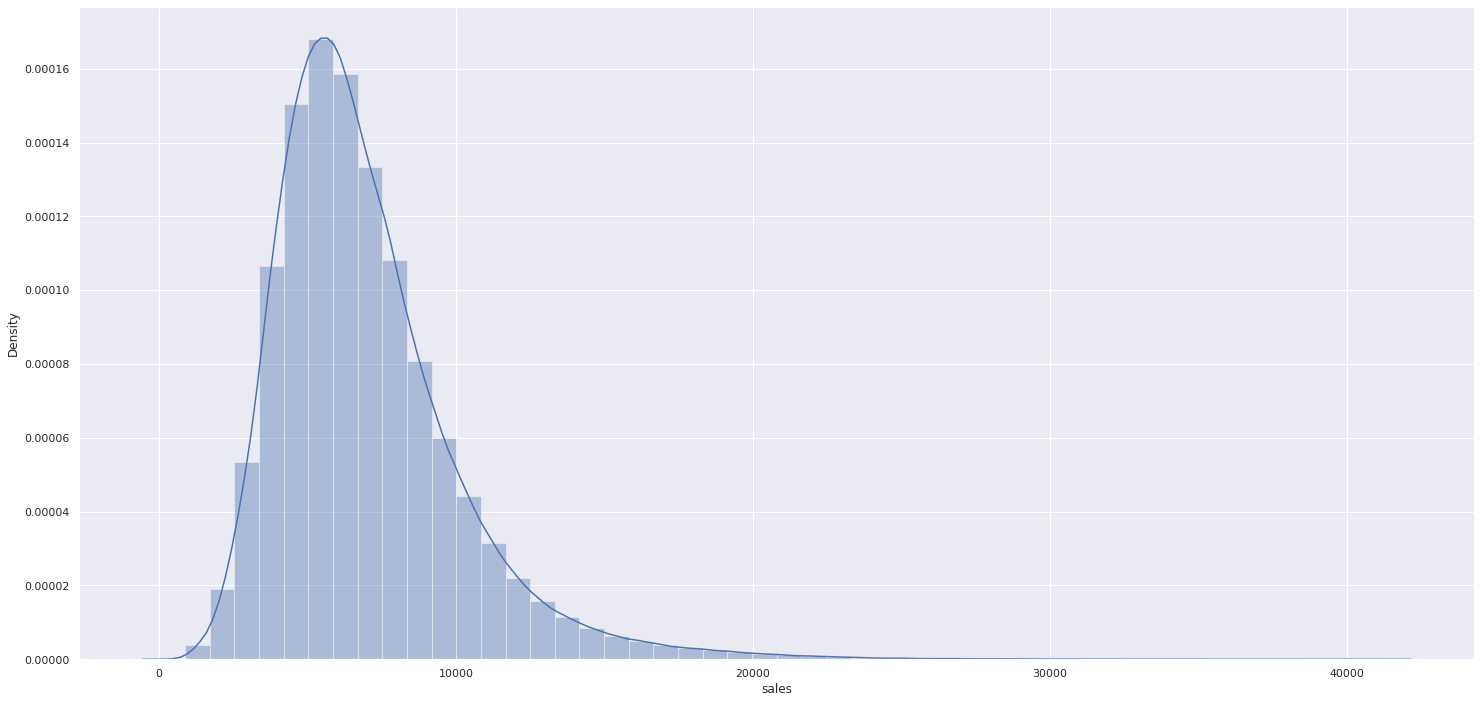

In [62]:
sns.distplot(df4['sales'])

##Yearly Sales Analysis

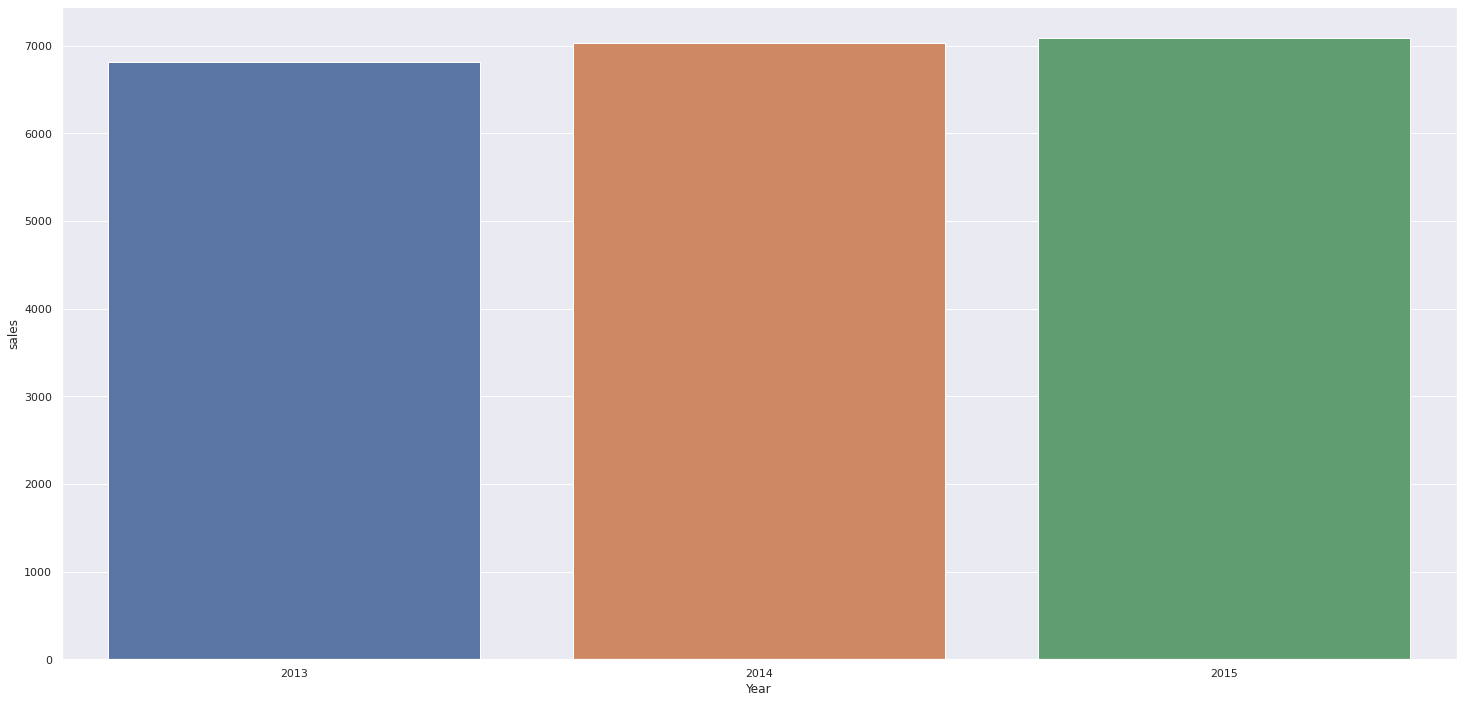

In [79]:
#Observing Yearly Sales of Roseman Stores
rosemangrpys = df4.groupby(['Year'],as_index = False)
rosemangrpys.groups
rosemangpys = rosemangrpys.agg({'sales':np.mean})
rosemangpys
sns.barplot(x='Year',y='sales',data = rosemangpys)

##Observation:
####Our Observations on Rosemann Store Yearly Sales Analysis - 
While Observing yearly sales of Rosemann Stores we observe that sales of Rosemann store stagnates on year on year basis. Rosemann team have to work vey hard to increase the yearly sales.

##Weekly sales Analysis

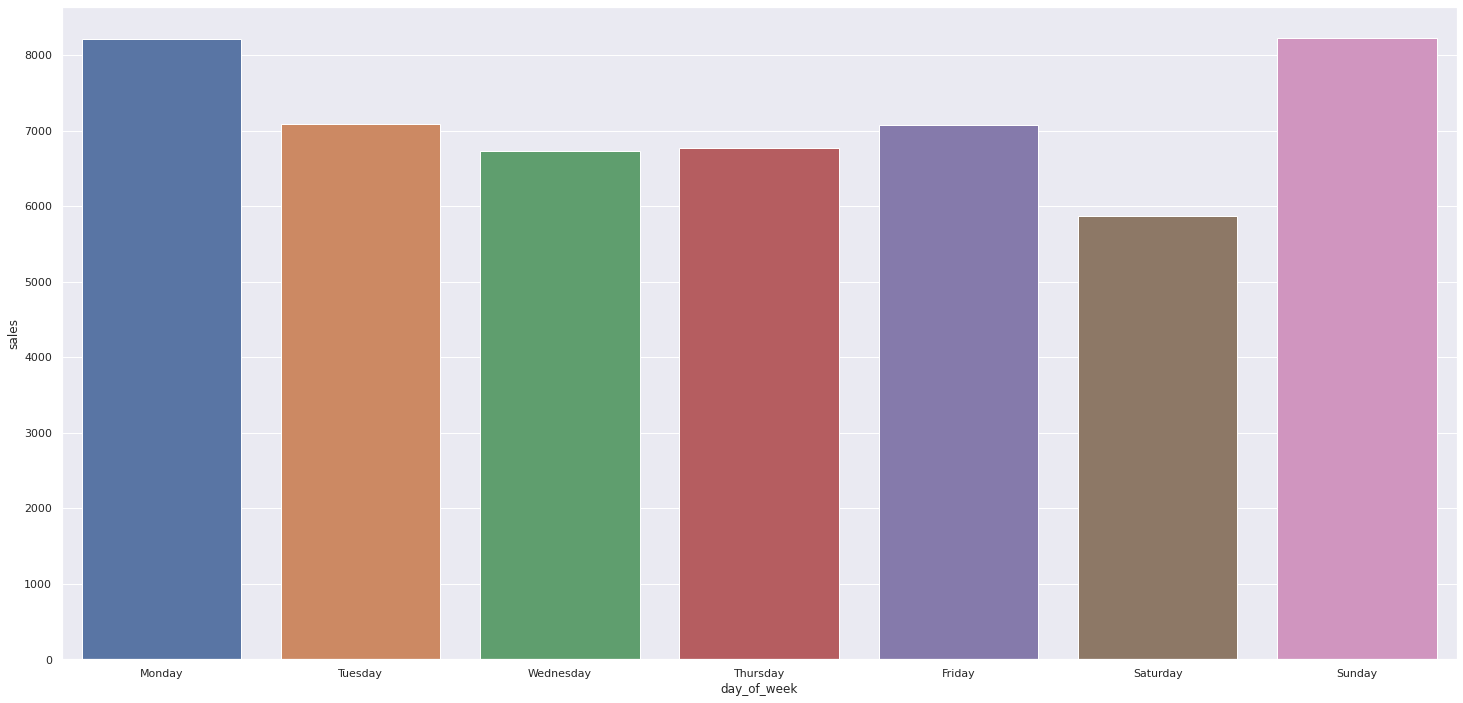

In [80]:
#sns.barplot(x='day_of_week',y='sales',data=df).set(title='Sales vs Day of Week')
rosemangrp = df4.groupby(['day_of_week'],as_index = False)
rosemangrp.groups
rosemangp = rosemangrp.agg({'sales':np.mean})
rosemangp
rosemangp['day_of_week'] =rosemangp['day_of_week'].map({7:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}).astype(str)
rosemangp
sns.barplot(x='day_of_week',y='sales',data = rosemangp)

###Observation
####Our Observations after anlysing weekdays sales- 
On analysing we observe that Rosemann store sales drops drastically on weekends especially on sundays mean people not prefer to go to stores on sundays and sales improve drastically on Monday and Tuesday, it indicates that people prefer shopping on roseman stores on weekday and not on weekends.

##Monthly Sales Analysis

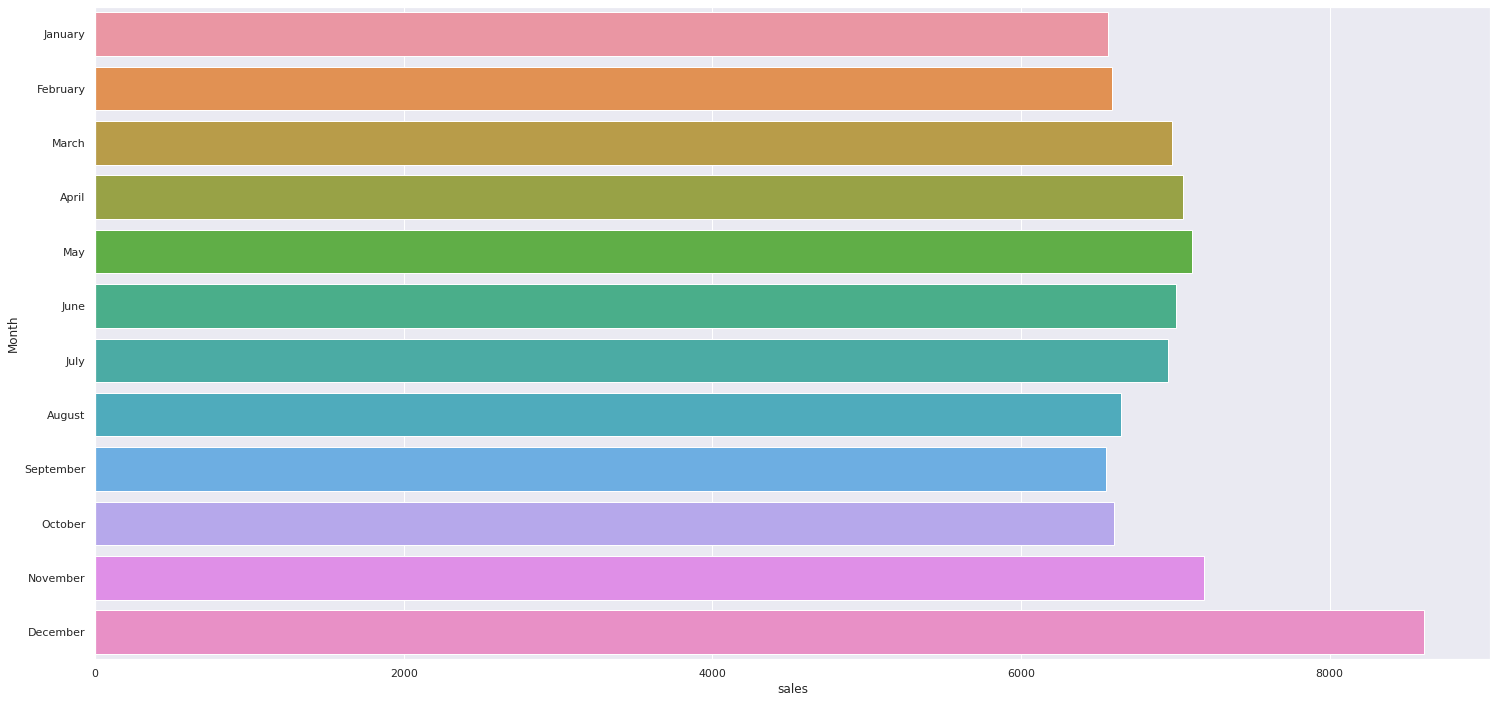

In [81]:
#Observing Monthly Sales of Roseman Stores
rosemangrpms = df4.groupby(['Month'],as_index = False)
rosemangrpms.groups
rosemangpms = rosemangrpms.agg({'sales':np.mean})
rosemangpms
rosemangpms['Month'] =rosemangpms['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}).astype(str)
rosemangpms
sns.barplot(x='sales',y='Month',data = rosemangpms)

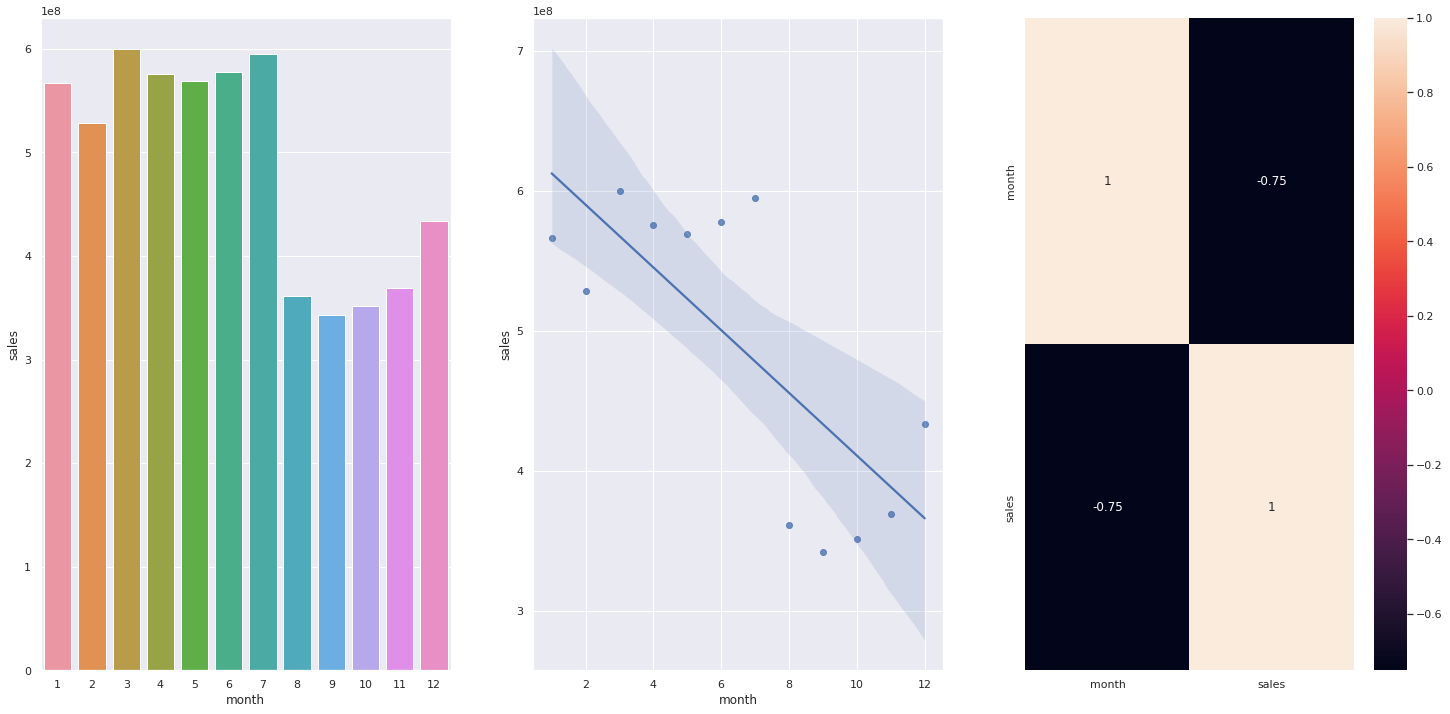

In [82]:
aux1 = df4[['month','sales']].groupby('month').sum().reset_index()

# bar plot sales per month
plt.subplot(1,3,1)
sns.barplot(x = 'month',y = 'sales', data = aux1);

# scatter plot sales per month
plt.subplot(1,3,2)
sns.regplot(x = 'month',y = 'sales', data = aux1);

# correlation month - sales
plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot = True);

##Observations
Our Observations on Rosemann Monthly Sales- We observe that Santa Clause have special blessing on Roseman Stores means in month of December sales increases.

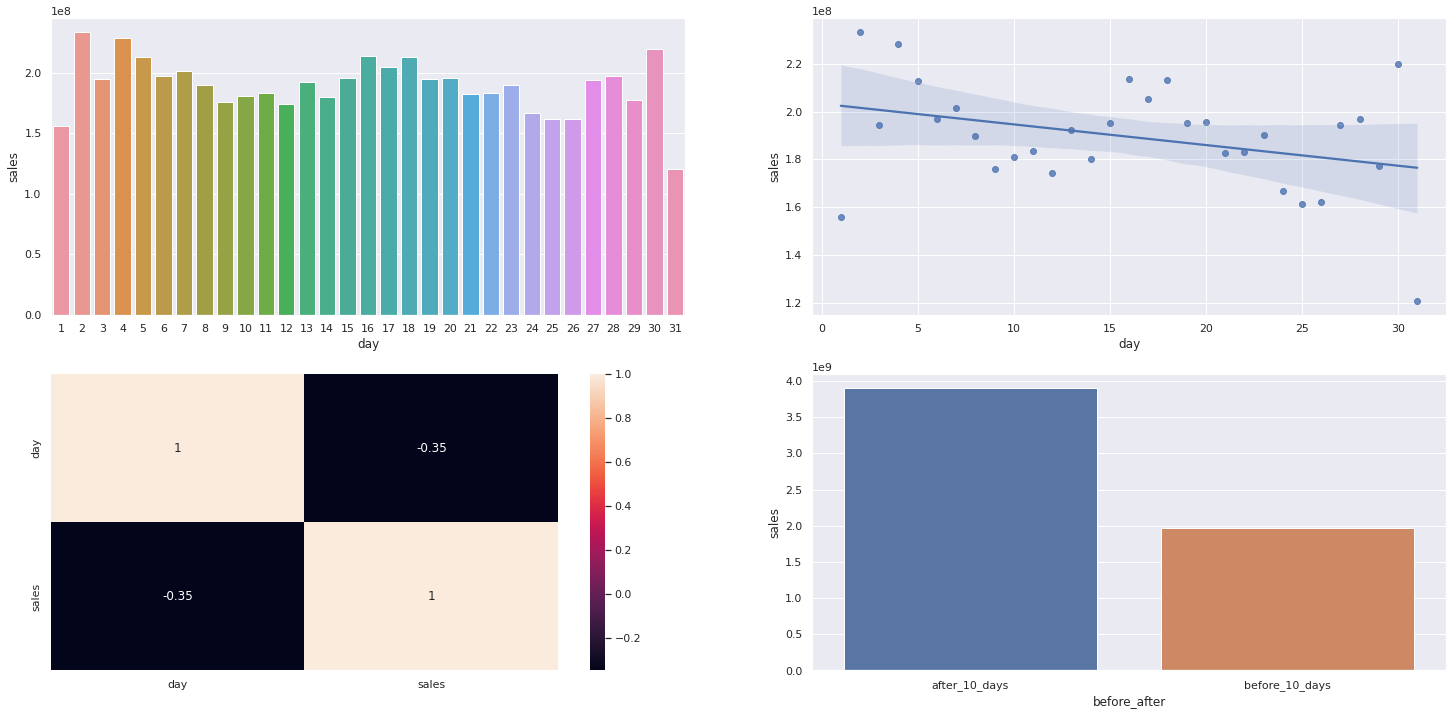

In [85]:
aux1 = df4[['day','sales']].groupby('day').sum().reset_index()

# bar plot sales per day
plt.subplot(2,2,1)
sns.barplot(x = 'day',y = 'sales', data = aux1);

# scatter plot sales per day
plt.subplot(2,2,2)
sns.regplot(x = 'day',y = 'sales', data = aux1);

# correlation day - sales
plt.subplot(2,2,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot = True);

# bar plot sales before the 10th and after the 10th
plt.subplot(2,2,4)
aux1['before_after'] = aux1['day'].apply(lambda x:'before_10_days' if x <= 10 else 'after_10_days')
aux2 = aux1[['before_after','sales']].groupby('before_after').sum().reset_index()
sns.barplot(x = 'before_after', y = 'sales', data = aux2);

###Promo Impact

[Text(0.5, 1.0, 'Sales on Promo')]

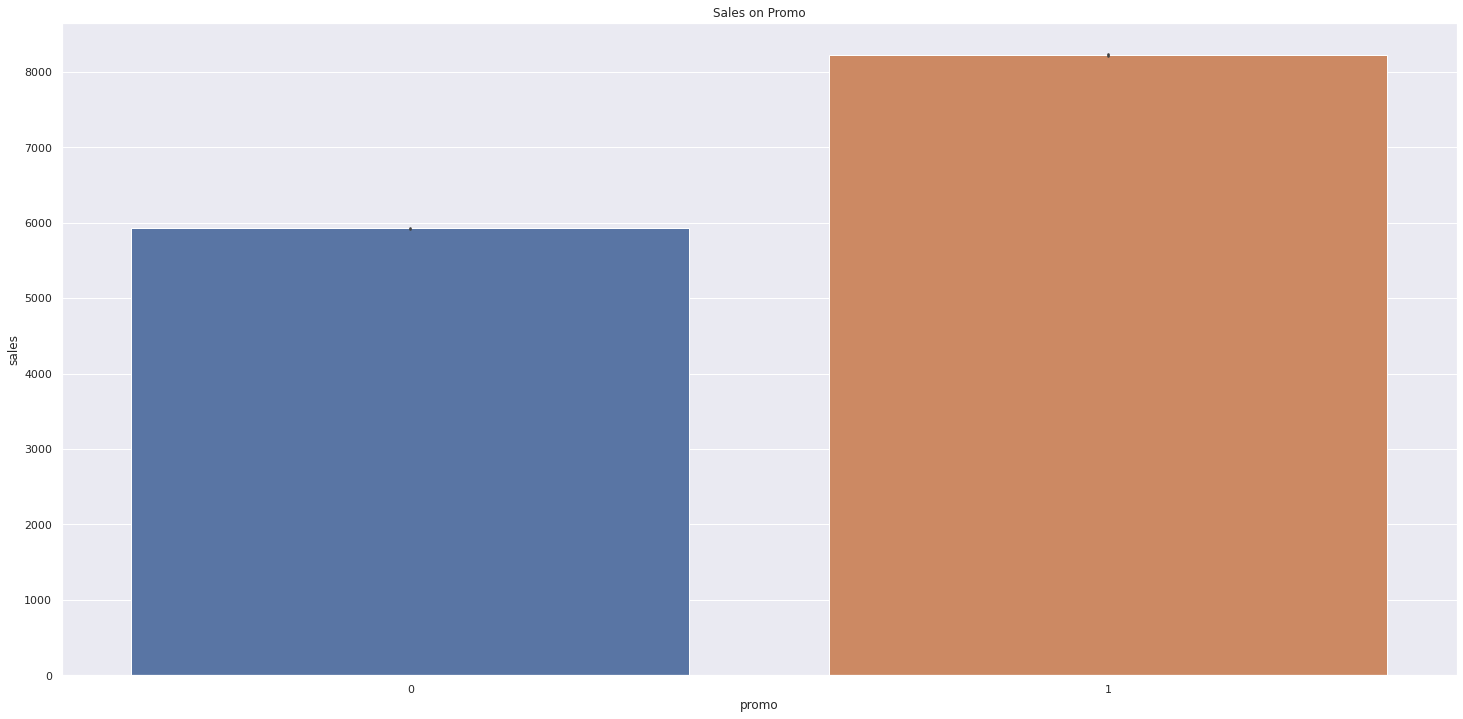

In [83]:
# Lets see how promo is impacting sales
sns.barplot(x='promo',y='sales',data=df4).set(title='Sales on Promo')

##Observation
Customers are definitely attracted by Promo codes, thus sales are higher when there is a Promo code in a Store

###State Holiday Impact

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



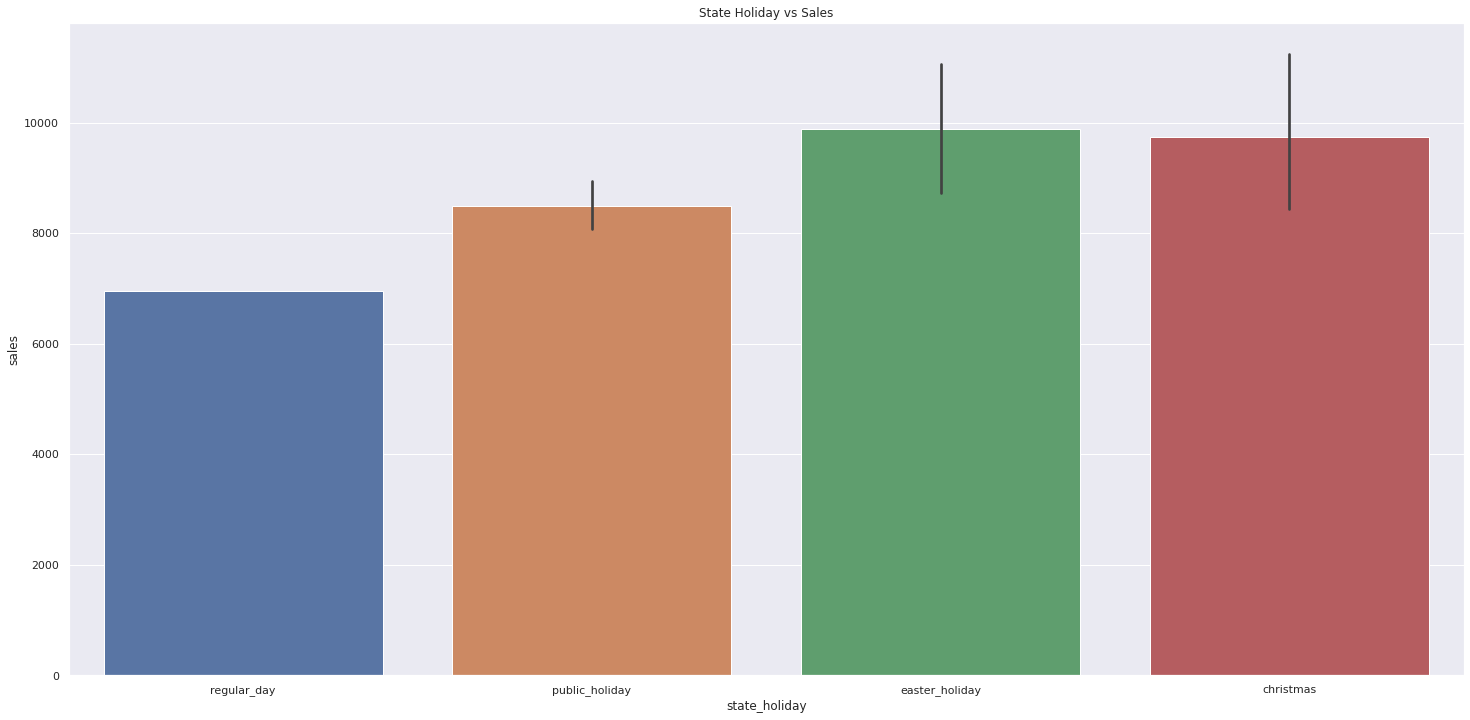

In [84]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"

df4['state_holiday'].loc[df4['state_holiday'] == 0] = '0'

# Sales with respect to State Holiday
sns.barplot(x='state_holiday', y='sales', data=df4).set(title='State Holiday vs Sales')
plt.show()

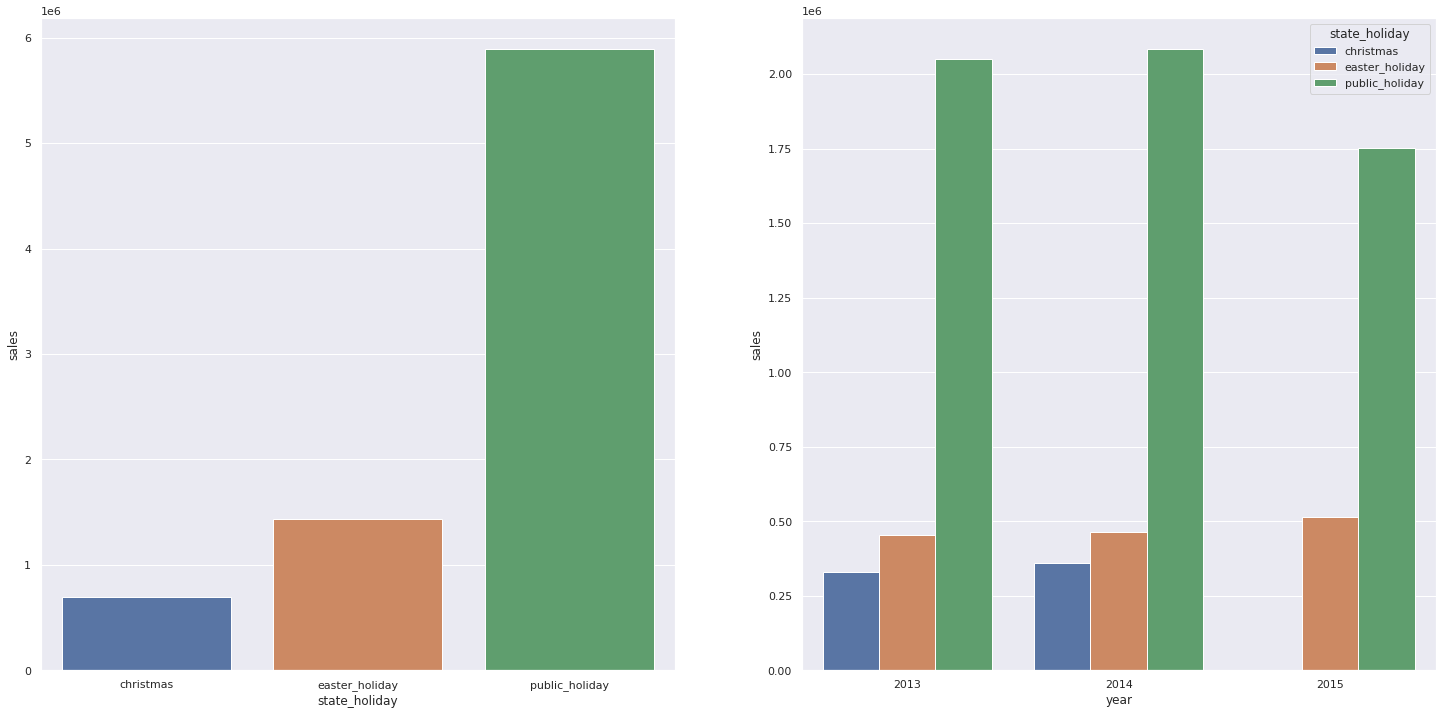

In [75]:
aux = df4[df4['state_holiday'] != 'regular_day']

# sales per holiday
plt.subplot(1, 2, 1)
aux1 = aux[['state_holiday', 'sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x = 'state_holiday', y = 'sales', data = aux1);

# sales per holiday, year
plt.subplot(1, 2, 2)
aux1 = aux[['year', 'state_holiday', 'sales']].groupby(['year', 'state_holiday']).sum().reset_index()
sns.barplot(x = 'year', y = 'sales', hue = 'state_holiday', data = aux1);

##Observation
Most stores are closed on State Holidays that's why we can see that there are very less sales in a,b,c
where

a = Public Holiday, b = Easter Holiday, c = Chirstmas, 0 = No Holiday, Working day

###School Holiday Imapct

[Text(0.5, 1.0, 'School Holiday vs Sales')]

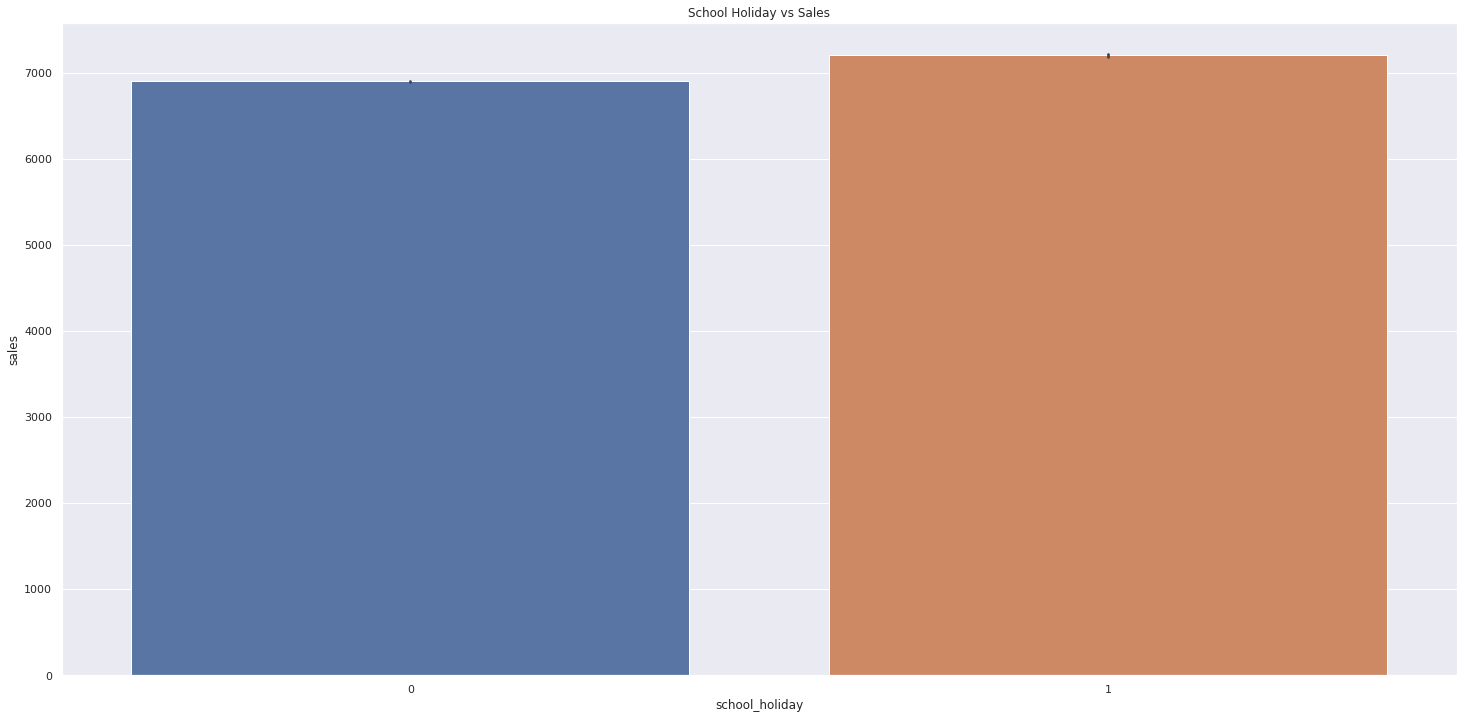

In [86]:
# Sales with respect to School Holiday
sns.barplot(x='school_holiday', y='sales', data=df4).set(title='School Holiday vs Sales')

##Observation
On School Holidays there are more sales.

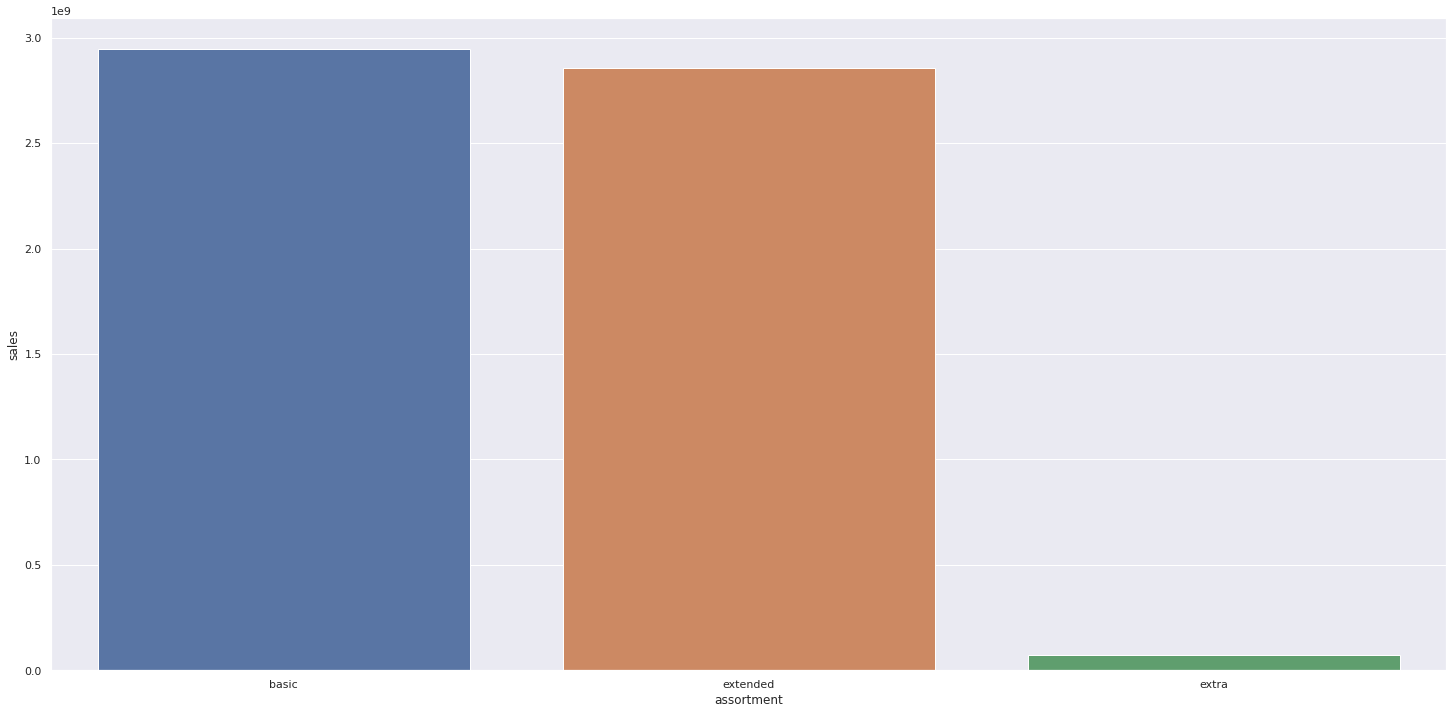

In [87]:
aux1 = df4[['assortment', 'sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot( x='assortment', y='sales', data=aux1 );

###Store Type Impact

[Text(0.5, 1.0, 'StoreType vs Sales')]

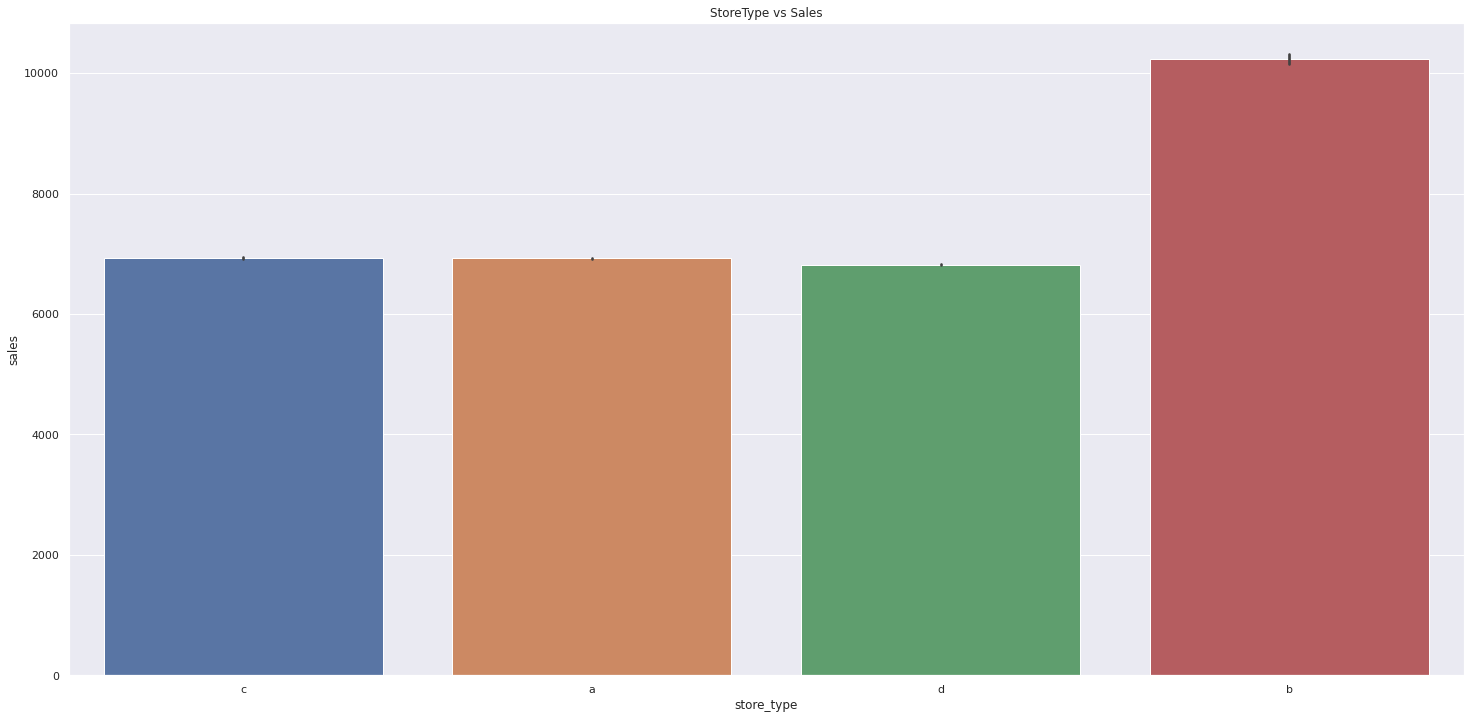

In [88]:
# Sales with respect to Storetype
sns.barplot(x='store_type', y='sales', data=df4).set(title='StoreType vs Sales')

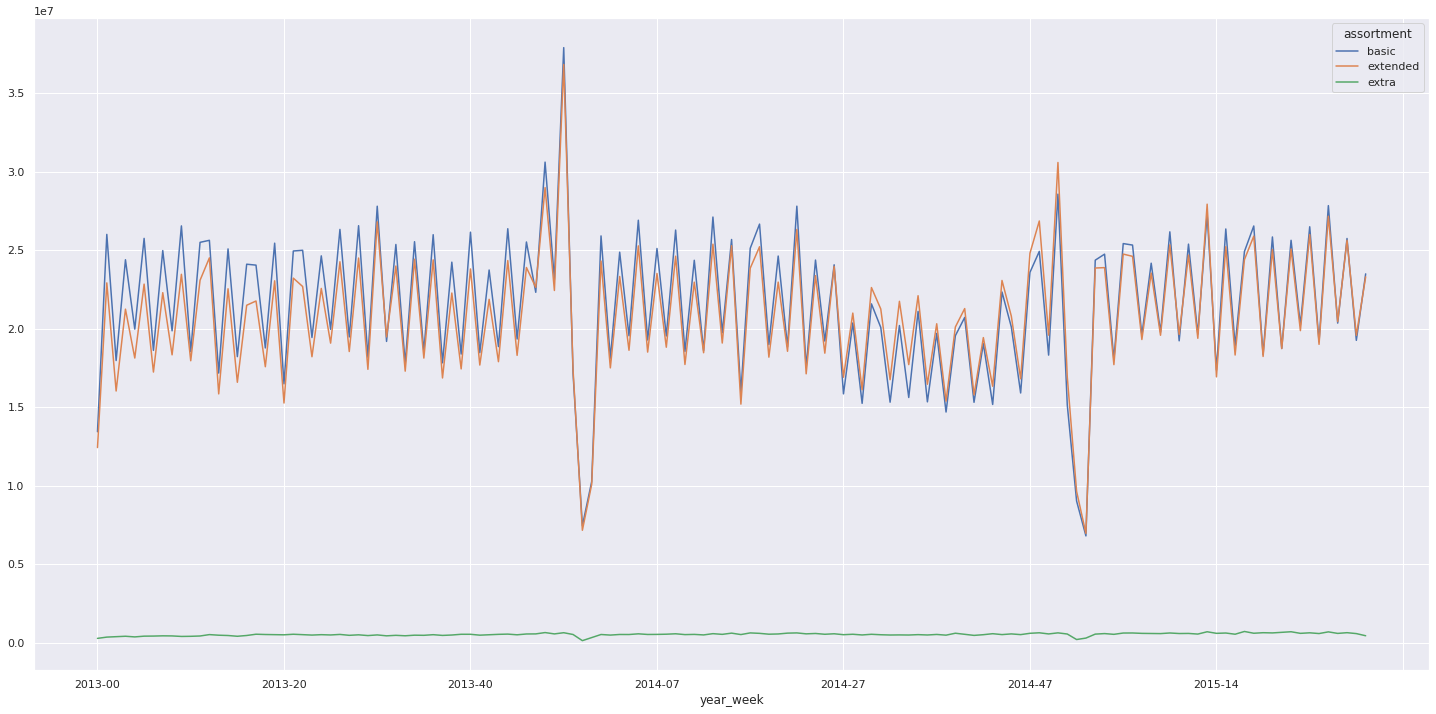

In [89]:
# check by year_week each assortment sales
aux2 = df4[['assortment','sales','year_week']].groupby(['year_week','assortment']).sum().reset_index()
aux3 = aux2.pivot(index = 'year_week', columns = 'assortment', values = 'sales')
aux3.plot();

##Observation
Of all a,b,c,d are store models b type stores have the highest sales

###Assortment Impact

[Text(0.5, 1.0, 'Assortment vs Sales')]

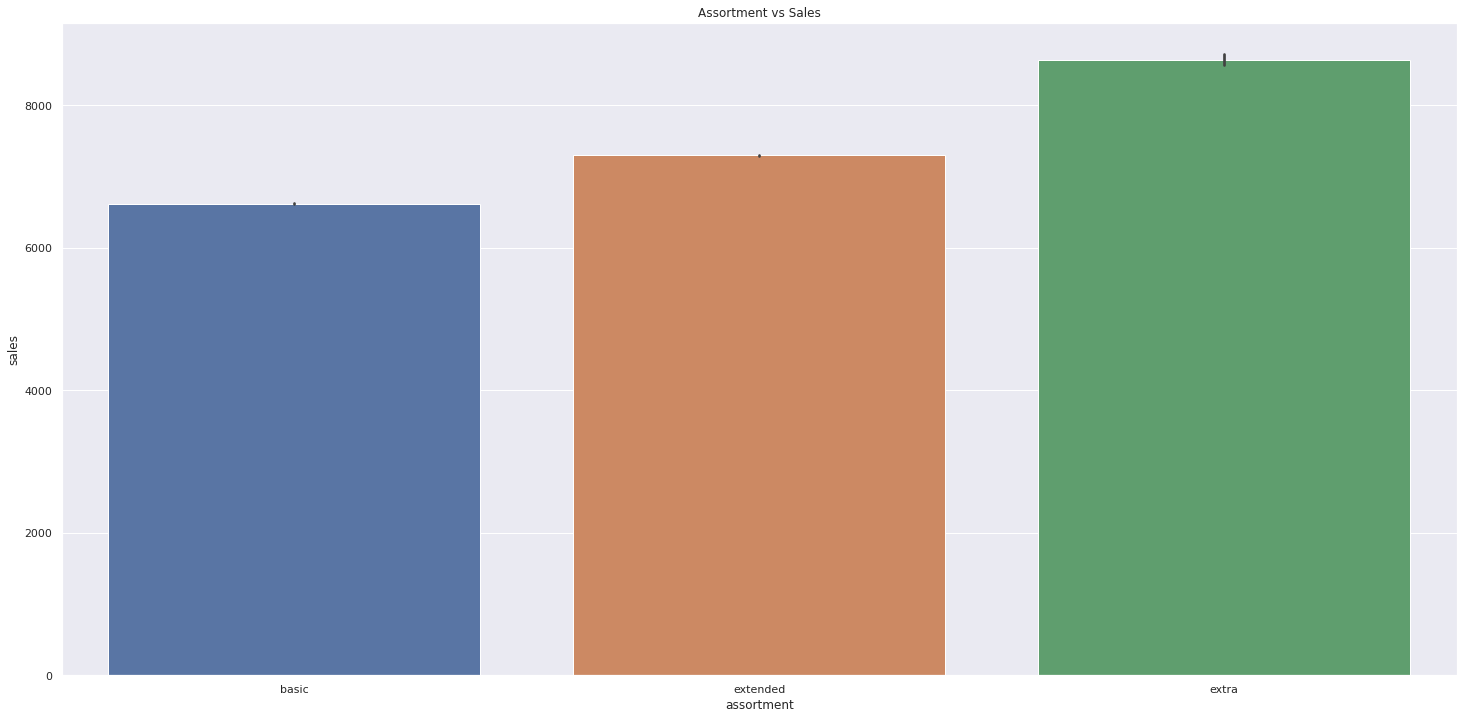

In [90]:
# Sales with respect to Assortment
sns.barplot(x='assortment', y='sales', data=df4).set(title='Assortment vs Sales')

##Observation
Assortment level 'b' have the highest sales

In [91]:
# Correlation
correlation = df.corr()
correlation

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,Year,Month,Day,WeekOfYear,is_promo
store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.013795,-0.033179,0.000459,0.008488,0.004996,0.014481,0.000290,0.001467,0.000023,0.001421,0.004630
day_of_week,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000005,-0.001710,0.000065,0.000168,-0.001988,0.000352,0.001937,-0.005362,0.005136,-0.004880,-0.004610
sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.024747,-0.002198,0.010006,-0.091040,0.055889,0.052108,0.023519,0.048768,-0.011612,0.052946,-0.038781
customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.078351,-0.007383,0.006806,-0.150159,0.040470,0.105810,-0.001212,0.038179,-0.004473,0.041404,-0.063646
open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.004611,0.000332,0.002509,-0.008309,0.001490,0.006157,-0.001009,-0.000681,0.033428,0.004792,-0.001883
promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000023,-0.003751,0.001216,-0.000983,0.000695,0.006066,0.024300,-0.011747,-0.108325,0.000572,0.005762
school_holiday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.002938,0.035017,0.000277,-0.006909,0.033089,-0.005146,-0.036535,0.103282,0.030538,0.071052,0.031809
competition_distance,-0.013795,-0.000005,-0.024747,-0.078351,0.004611,0.000023,-0.002938,1.000000,-0.037913,0.038144,-0.103000,-0.025100,0.049599,0.000119,0.000608,0.000008,0.000588,-0.047056
competition_open_since_month,-0.033179,-0.001710,-0.002198,-0.007383,0.000332,-0.003751,0.035017,-0.037913,1.000000,-0.139402,-0.032089,0.109624,0.028344,-0.085936,0.318912,0.003968,0.308386,-0.026708
competition_open_since_year,0.000459,0.000065,0.010006,0.006806,0.002509,0.001216,0.000277,0.038144,-0.139402,1.000000,-0.015238,-0.010997,0.003458,0.045400,-0.008743,-0.000065,-0.008277,-0.013149


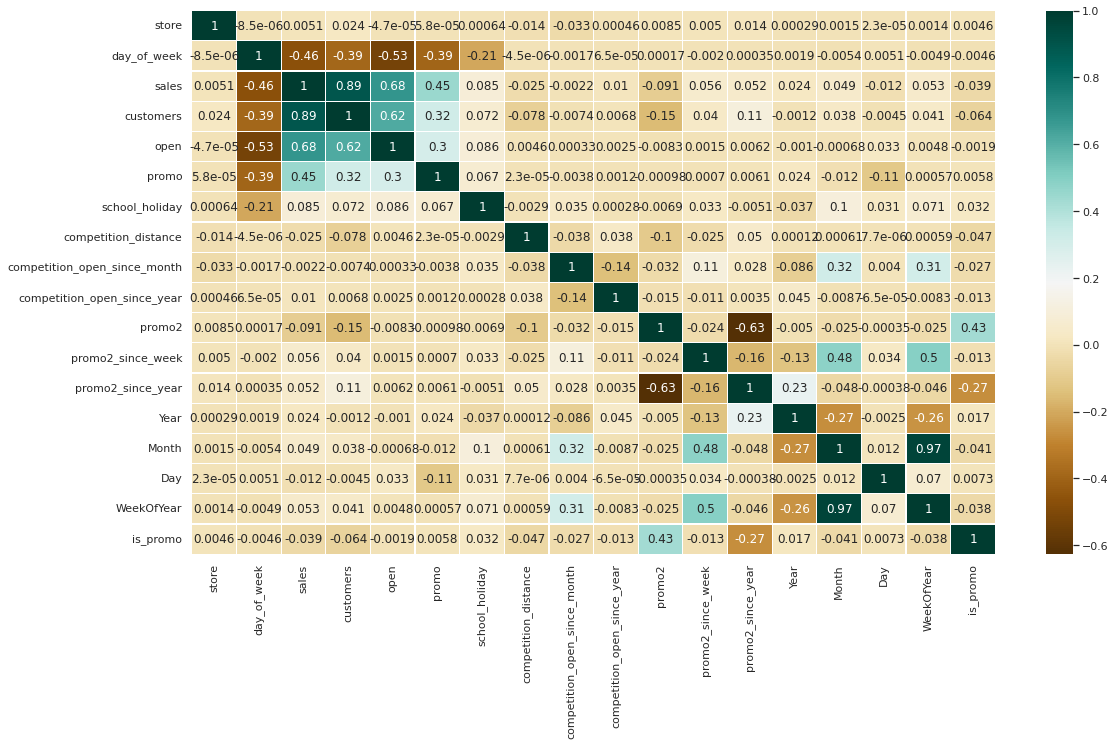

In [92]:
# Heat Map
plt.figure(figsize=(18,10))
sns.heatmap(correlation, annot=True, linewidths=0.2, cmap='BrBG')

##Observation
Correlation map shows

Sales is highly correlated with Customers, Open and Promo code and minorly correlated to school holidays

Since Rosemann problem is a problem of continous sales data. Exponential Moving Averages are (EMA) best indicator to analyse 
* A. Trend in a Data - This means that sales data is in a uptrend or downtrend. 
* B. Seasonality in a data- This means where sales figure increases in some speciific timeframes.

For ananlysing regression problems Exponential Moving Average (EMA) figures gives complete picure of data. By analysing this data we are able to understand whether doing business is feasible what are the important opportunities when we are able to get optimum benifits.

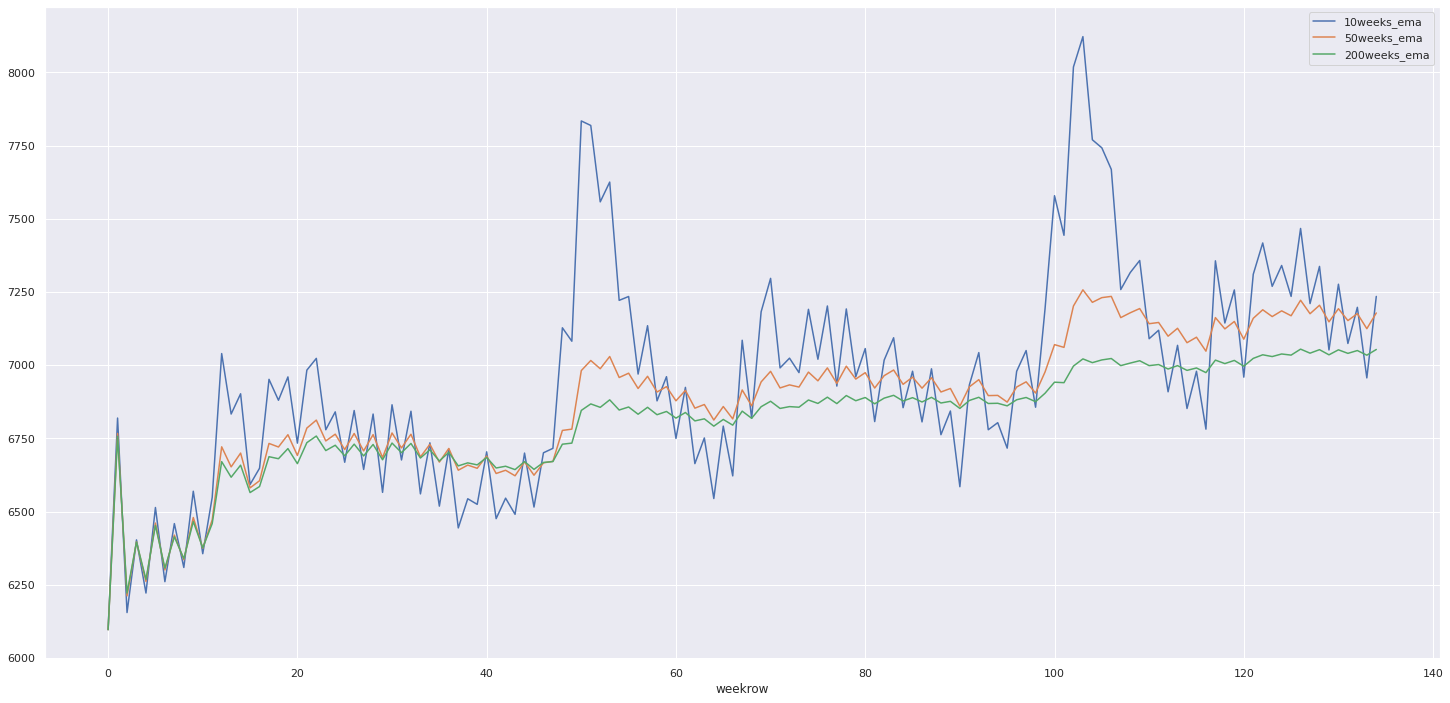

In [93]:
#Exponential Moving Average chart of Sales figure
rosemanall_weekly = df4.groupby(['Year','WeekOfYear'],as_index = False)
rosemanall_weekly.groups
rosemanall_weekly = rosemanall_weekly.agg({'sales':np.mean})
rosemanll_weekly = rosemanall_weekly.sort_values(by = ['Year','WeekOfYear'])
rosemanall_weekly['weekrow']= rosemanall_weekly.reset_index().index

rosemanall_weekly['10weeks_ema'] = rosemanall_weekly.sales.ewm(span=10).mean()
rosemanall_weekly['50weeks_ema'] = rosemanall_weekly.sales.ewm(span=50).mean()
rosemanall_weekly['200weeks_ema'] = rosemanall_weekly.sales.ewm(span=200).mean()
rosemanall_weekly.plot('weekrow', ['10weeks_ema','50weeks_ema','200weeks_ema'])
plt.show()

##Observations 
While Analysing Exponential Moving Average chart Rosemann sales we analyse following observations:

Trend - EMA chart analyse that Rosemann data is in uptrend and it always above the 200 Exponential Moving Average figures but 200 EMA line is not a steep slope informs that Rosemann sales figure is in slow uptrend.

Seasonlity - 10 weeks EMA chart figures shows that sales has upward seasonality and for some weeks sales figures improves drastically.

###Store Type Wise Exponential Moving Average Analysis
While analysing database we observe that Rosemann have four different types of stores. After analysing complete dataset, We now analyse Exponential Moving Average Analysis of Sales figures Storetype wise means how the behaviour of different store types in order to going deeper and understand how to improve sales.

In [94]:
#Moving Average Chart of Store Wise Sales Figure
rosemanall_a = df4.loc[df['store_type'] == 'a']
rosemanall_b = df4.loc[df['store_type'] == 'b']
rosemanall_c = df4.loc[df['store_type'] == 'c']
rosemanall_d = df4.loc[df['store_type'] == 'd']

###STORETYPE A WEEKLY EMA CHART

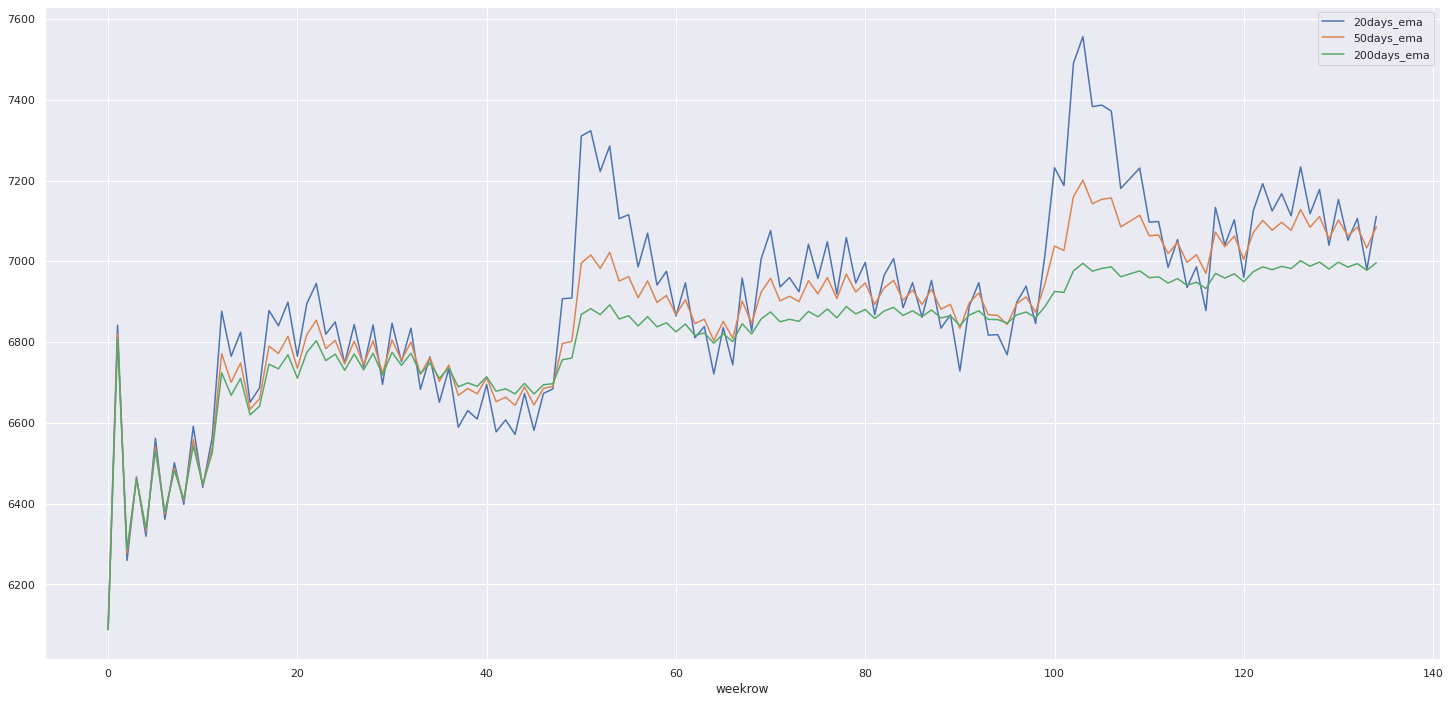

In [95]:
#EMA Analysis Storewise
rosemanall_a_weekly = rosemanall_a.groupby(['Year','WeekOfYear'],as_index = False)
rosemanall_a_weekly.groups
rosemanall_a_weekly = rosemanall_a_weekly.agg({'sales':np.mean})
rosemanll_weekly = rosemanall_a_weekly.sort_values(by = ['Year','WeekOfYear'])
rosemanall_a_weekly['weekrow']= rosemanall_a_weekly.reset_index().index

rosemanall_a_weekly['20days_ema'] = rosemanall_a_weekly.sales.ewm(span=20).mean()
rosemanall_a_weekly['50days_ema'] = rosemanall_a_weekly.sales.ewm(span=50).mean()
rosemanall_a_weekly['200days_ema'] = rosemanall_a_weekly.sales.ewm(span=200).mean()

rosemanall_a_weekly.plot('weekrow',['20days_ema','50days_ema','200days_ema'])
plt.show()

###STORETYPE B WEEKLY CHART

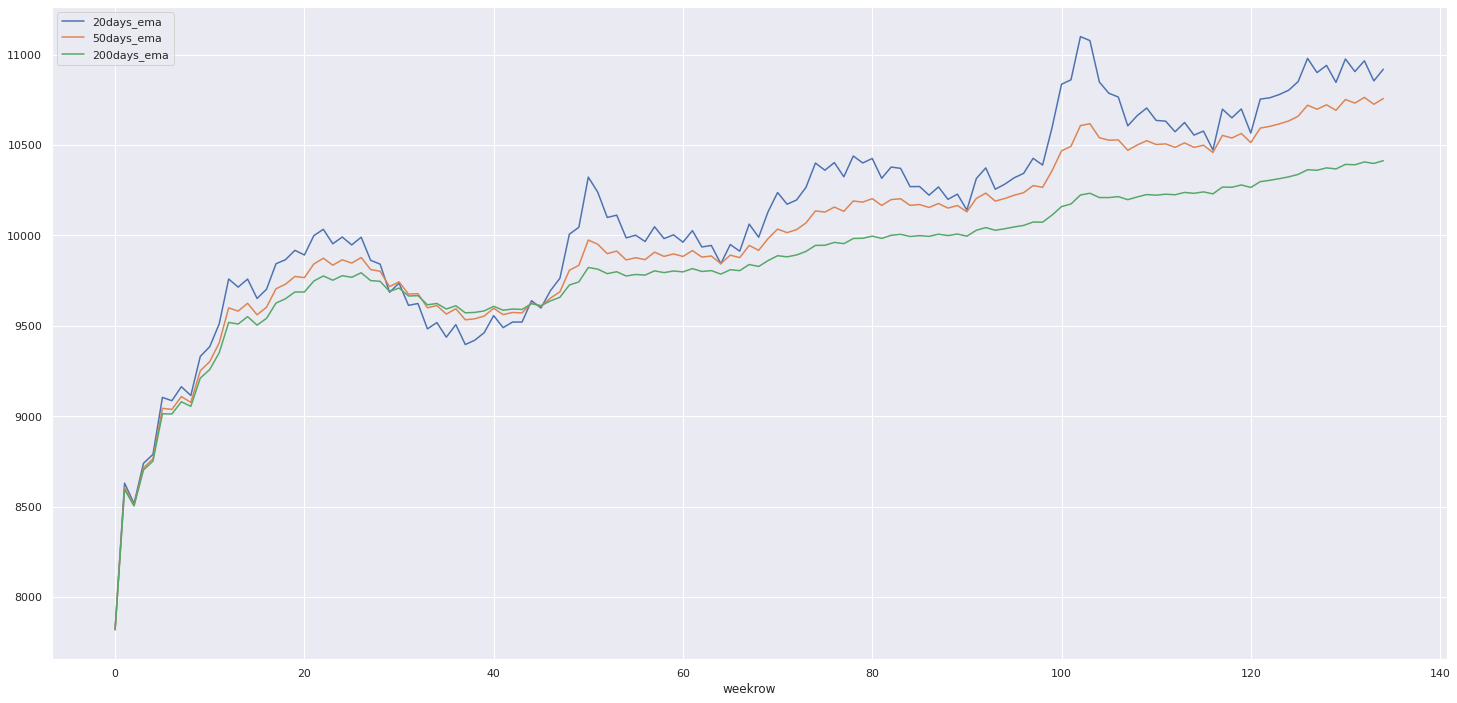

In [96]:
#EMA Analysis Storewise
rosemanall_b_weekly = rosemanall_b.groupby(['Year','WeekOfYear'],as_index = False)
rosemanall_b_weekly.groups
rosemanall_b_weekly = rosemanall_b_weekly.agg({'sales':np.mean})
rosemanll_weekly = rosemanall_b_weekly.sort_values(by = ['Year','WeekOfYear'])
rosemanall_b_weekly['weekrow']= rosemanall_b_weekly.reset_index().index

rosemanall_b_weekly['20days_ema'] = rosemanall_b_weekly.sales.ewm(span=20).mean()
rosemanall_b_weekly['50days_ema'] = rosemanall_b_weekly.sales.ewm(span=50).mean()
rosemanall_b_weekly['200days_ema'] = rosemanall_b_weekly.sales.ewm(span=200).mean()

rosemanall_b_weekly.plot('weekrow',['20days_ema','50days_ema','200days_ema'])
plt.show()

###STORETYPE C WEEKLY CHART

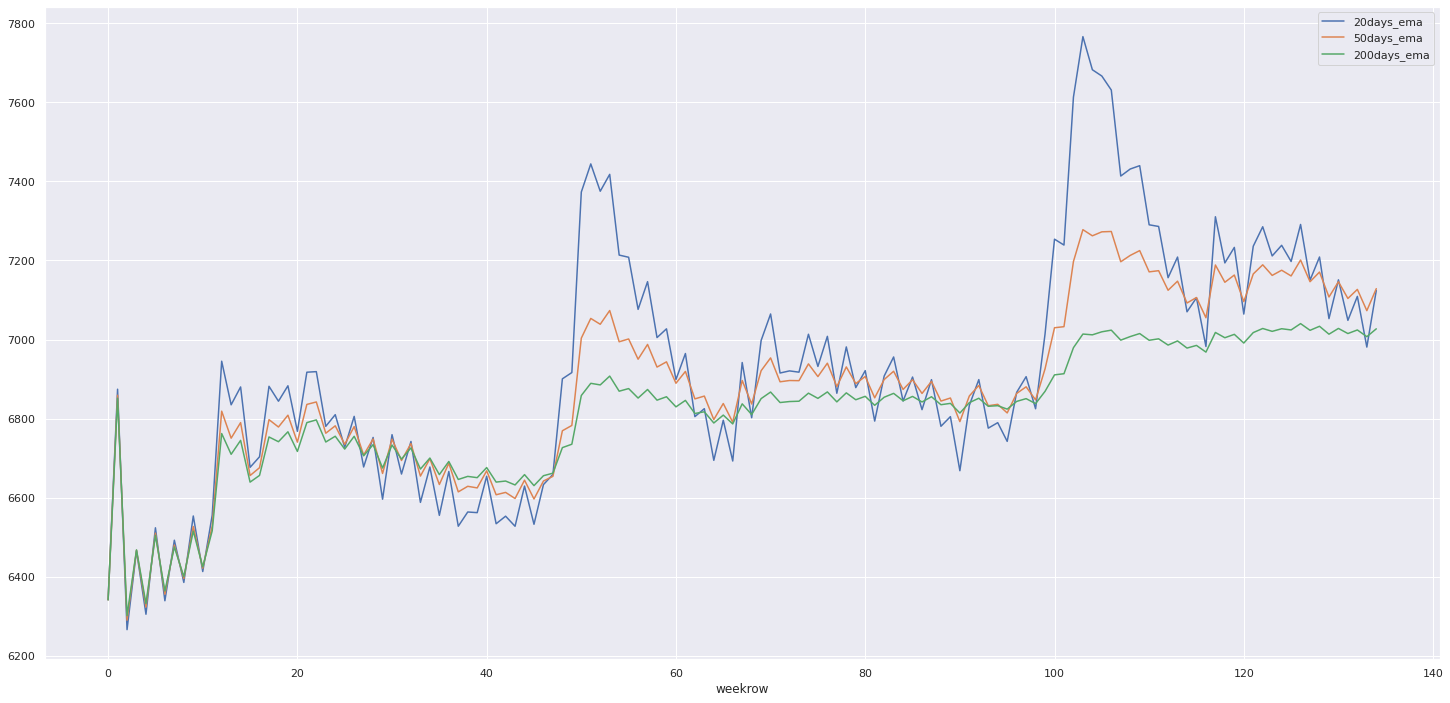

In [97]:
#EMA Analysis Storewise
rosemanall_c_weekly = rosemanall_c.groupby(['Year','WeekOfYear'],as_index = False)
rosemanall_c_weekly.groups
rosemanall_c_weekly = rosemanall_c_weekly.agg({'sales':np.mean})
rosemanll_weekly = rosemanall_c_weekly.sort_values(by = ['Year','WeekOfYear'])
rosemanall_c_weekly['weekrow']= rosemanall_c_weekly.reset_index().index

rosemanall_c_weekly['20days_ema'] = rosemanall_c_weekly.sales.ewm(span=20).mean()
rosemanall_c_weekly['50days_ema'] = rosemanall_c_weekly.sales.ewm(span=50).mean()
rosemanall_c_weekly['200days_ema'] = rosemanall_c_weekly.sales.ewm(span=200).mean()

rosemanall_c_weekly.plot('weekrow',['20days_ema','50days_ema','200days_ema'])
plt.show()

###STORETYPE D WEEKLY EMA CHART

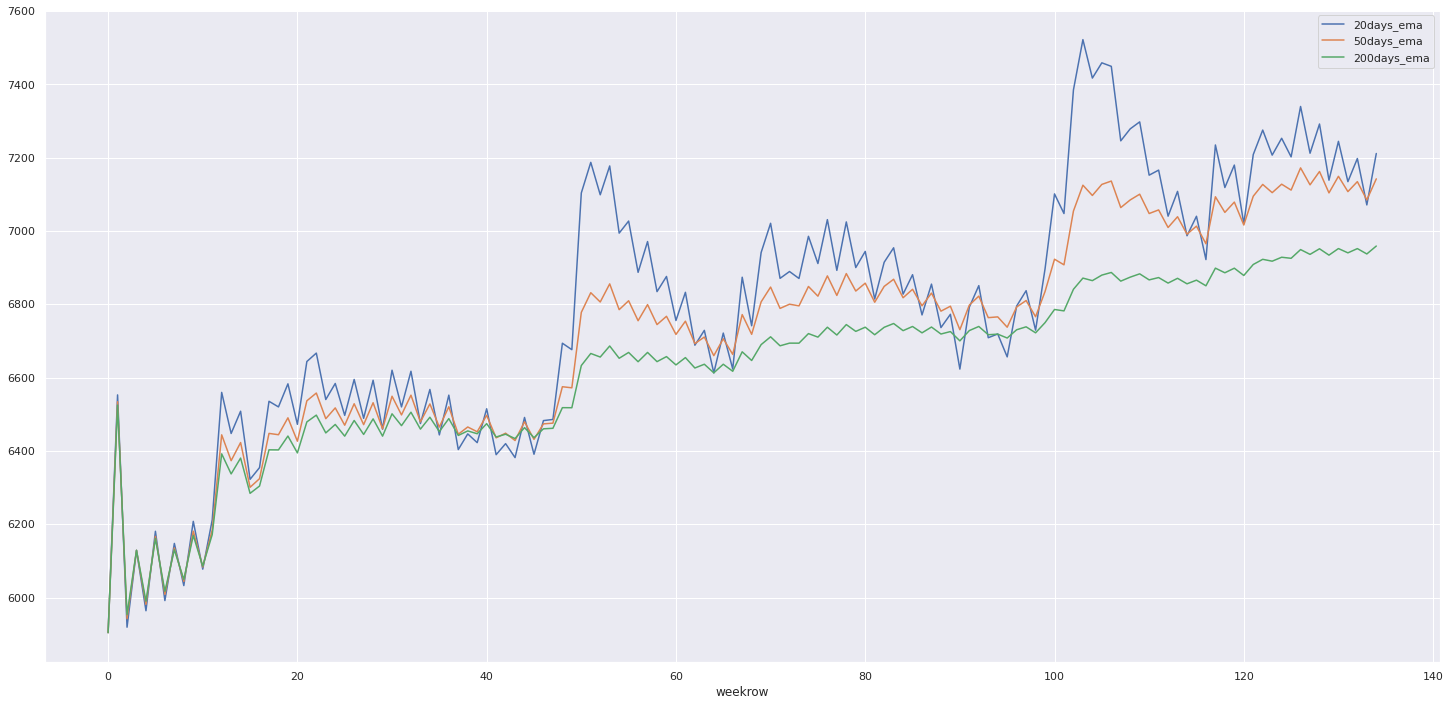

In [98]:
#EMA Analysis Storewise
rosemanall_d_weekly = rosemanall_d.groupby(['Year','WeekOfYear'],as_index = False)
rosemanall_d_weekly.groups
rosemanall_d_weekly = rosemanall_d_weekly.agg({'sales':np.mean})
rosemanll_weekly = rosemanall_d_weekly.sort_values(by = ['Year','WeekOfYear'])
rosemanall_d_weekly['weekrow']= rosemanall_d_weekly.reset_index().index

rosemanall_d_weekly['20days_ema'] = rosemanall_d_weekly.sales.ewm(span=20).mean()
rosemanall_d_weekly['50days_ema'] = rosemanall_d_weekly.sales.ewm(span=50).mean()
rosemanall_d_weekly['200days_ema'] = rosemanall_d_weekly.sales.ewm(span=200).mean()

rosemanall_d_weekly.plot('weekrow',['20days_ema','50days_ema','200days_ema'])
plt.show()

##Observations
Our Observations after analysis of Rosemann Storetype wise Exponential Moving Average Charts are:

After analysing consolidated data we now analyse Rosemann Data Storewise. Following observations found

<b>STORETYPE A</b> - While analysing Exponential Moving Average Chart of Store Type A we observe that -Store type A sales figure in slight uptrend 20 days EMA never crosses 200 days EMA. -We observe seasonality in EMA chart and found sales of Storetype A sharply increase at Week 50 and week 105.

<b>STORETYPE B</b> - While analysing Exponential Moving Average Chart of Store Type B we observe that
* Storetype B Sales figures are in strong uptrend and 20 days EMA never crosses 50 days EMA sales chart of Storetype B is very strong.
* Although this chart is very strong we observe seasonality in upward seasonality at week 50 and week 105.


<b>STORETYPE C</b> - While analysing Exponential Moving Average Chart of Store Type C we observe that 
* Store type A sales figure in slight uptrend 20 days EMA never crosses 200 days EMA. 
* We observe seasonality in EMA chart and found sales of Storetype A sharply increase at Week 50 and week 105.

<b>STORETYPE D</b> - While analysing Exponential Moving Average Chart of Store Type D we observe that 
* Storetype D sales chart is in uptrend and better chart than Storetype A and C. 
* In this EMA chart we observe that support of 20 days EMA at 50 days EMA and most of time 20 days EMA line not cuts downward 20 days EMA line.


After analysing all the EMA charts store wise we observe following out of all the store type Rosemann has to focus aggresively on opening new Storetype B and D and focus on closure of Storetype A and C.Exponential Moving Average Analysis is a part of Time Series Analysis and Roseman problem is a time series analysis problem our conclusion is that EMA chart analysis gives us very indepth understanding of Roseman sales.

<h1><b>Conclusion of EDA</b></h1>

* The most selling and crowded StoreType is A.

* The best "Sale per Customer" StoreType D indicates to the higher Buyer Cart. We could also assume that the stores of this types are situated in the rural areas, so that customers prefer buying more but less often.

* Low SalePerCustomer amount for StoreType B indicates to the possible fact that people shop there essentially for small things. Which can also indicate to the label of this store type - "urban" - as it's more accessible for public, and customers don't mind shopping there from time to time during a week.

* Customers tends to buy more on Mondays when there's one promotion running (Promo) and on Sundays when there is no promotion at all (both Promo and Promo1 are equal to 0).

* Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount.

* Sales is highly correlated to number of Customers.

* For all stores, Promotion leads to increase in Sales and Customers both.

* Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.

<h1><b>Data Preparation</b>

Data preparation types:

**1. Normalization**: rescale data center to 0 with standart deviation equals 1.

**2. Rescaling**: rescale data to interval [0,1].

**3. Transformation**: categorical features to numerical features (encoding) or nature transformation (example: turn month feature to cyclic data).

In [99]:
df5 = df4.copy()

<h1><b>Normalization</b>

Since there is no normal distribution, as seen in Section ["Exploratory Data Analysis"](#exploratory_data_analysis), in our numerical variables, we will not use normalization.

 <h1><b>Rescaling</b>

Features with many outliers will be rescaled with RobustScaler, which uses quartiles to rescale instead of data maximun and minimun. For variables without many outliers, we will use MinMaxScaler.

In [100]:
#selecting numerical features
a = df5.select_dtypes(include = ['int64','float64'])
a.head()

,store,day_of_week,sales,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,Year,Month,Day,is_promo,year,month,day,competition_time_month,promo_time_week
0,1,5,5263,1,1,1270.0,9,2008,0,31,2015,2015,7,31,0,2015,7,31,84,0
1,2,5,6064,1,1,570.0,11,2007,1,13,2010,2015,7,31,1,2015,7,31,94,279
2,3,5,8314,1,1,14130.0,12,2006,1,14,2011,2015,7,31,1,2015,7,31,105,226
3,4,5,13995,1,1,620.0,9,2009,0,31,2015,2015,7,31,0,2015,7,31,71,0
4,5,5,4822,1,1,29910.0,4,2015,0,31,2015,2015,7,31,0,2015,7,31,4,0


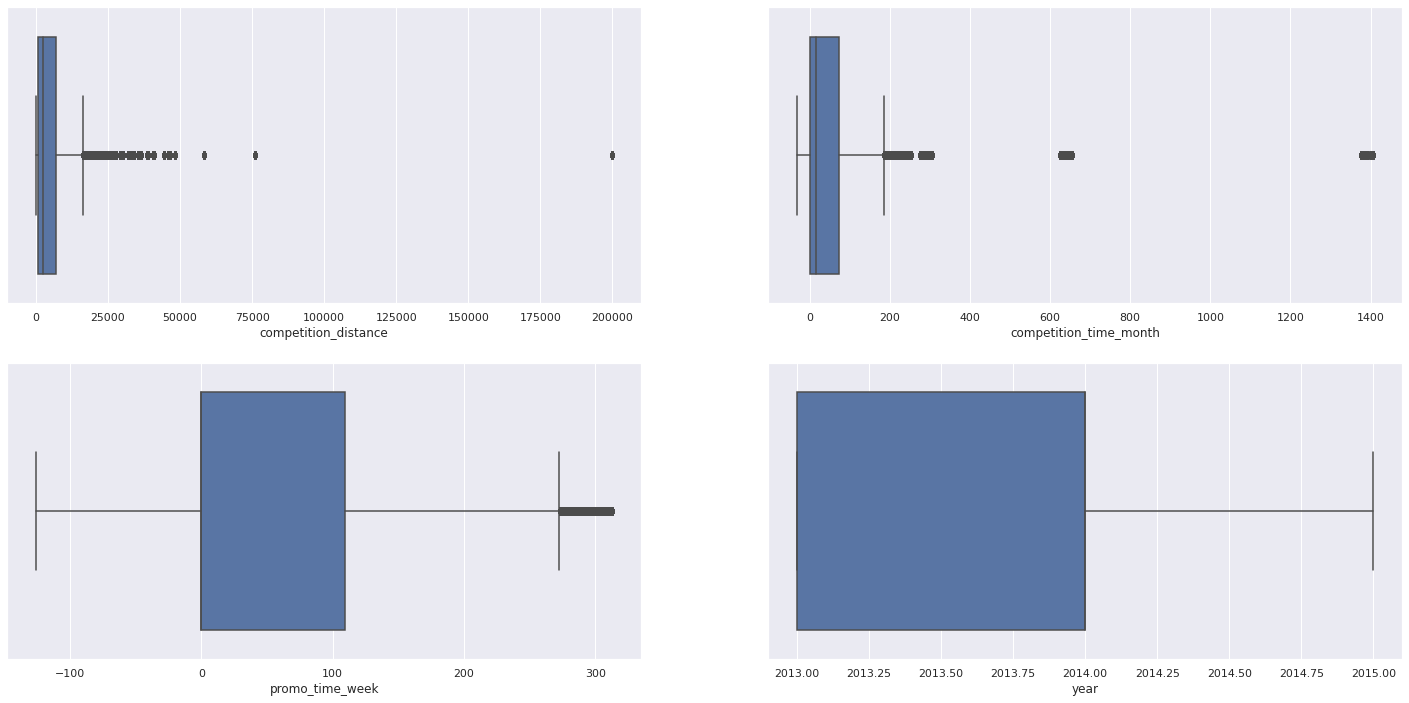

In [101]:
#boxplots
plt.subplot(2,2,1)
sns.boxplot(x = 'competition_distance', data = df5);

plt.subplot(2,2,2)
sns.boxplot(x = 'competition_time_month', data = df5);

plt.subplot(2,2,3)
sns.boxplot(x = 'promo_time_week', data = df5);

plt.subplot(2,2,4)
sns.boxplot(x = 'year', data = df5);

* **competition_distance** \\(\rightarrow\\) There are many outliers, so we will use RobustScaler.
* **year** \\(\rightarrow\\)  There are no outliers, so we will use MinMaxScaler.
* **competition_time_month** \\(\rightarrow\\)  There are many outliers, so we will use RobustScaler.
* **promo_time_week** \\(\rightarrow\\)  There aren't many outliers, so we will use MinMaxScaler.

In [105]:
pip install boruta

     |████████████████████████████████| 56 kB 2.2 MB/s 


In [107]:
import pickle
from boruta import BorutaPy
import requests

from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb

In [109]:
# instantiate classes
rs = RobustScaler()
mms = MinMaxScaler()

#competition_distance - RobustScaler
df5['competition_distance'] = rs.fit_transform(df5[['competition_distance']].values)
pickle.dump(rs, open("/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Supervised_ML_Regression/scalers/competition_distance_scaler.pkl",'wb'))

#year - MinMaxScaler
df5['year'] = mms.fit_transform(df5[['year']].values)
pickle.dump(mms, open("/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Supervised_ML_Regression/scalers/year_scaler.pkl", 'wb'))

#competition_time_month - RobustScaler
df5['competition_time_month'] = rs.fit_transform(df5[['competition_time_month']].values)
pickle.dump(rs, open("/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Supervised_ML_Regression/scalers/competition_time_month_scaler.pkl",'wb'))

#promo_time_week - MinMaxScaler
df5['promo_time_week'] = mms.fit_transform(df5[['promo_time_week']].values)
pickle.dump(rs, open("/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Supervised_ML_Regression/scalers/promo_time_week_scaler.pkl",'wb'))

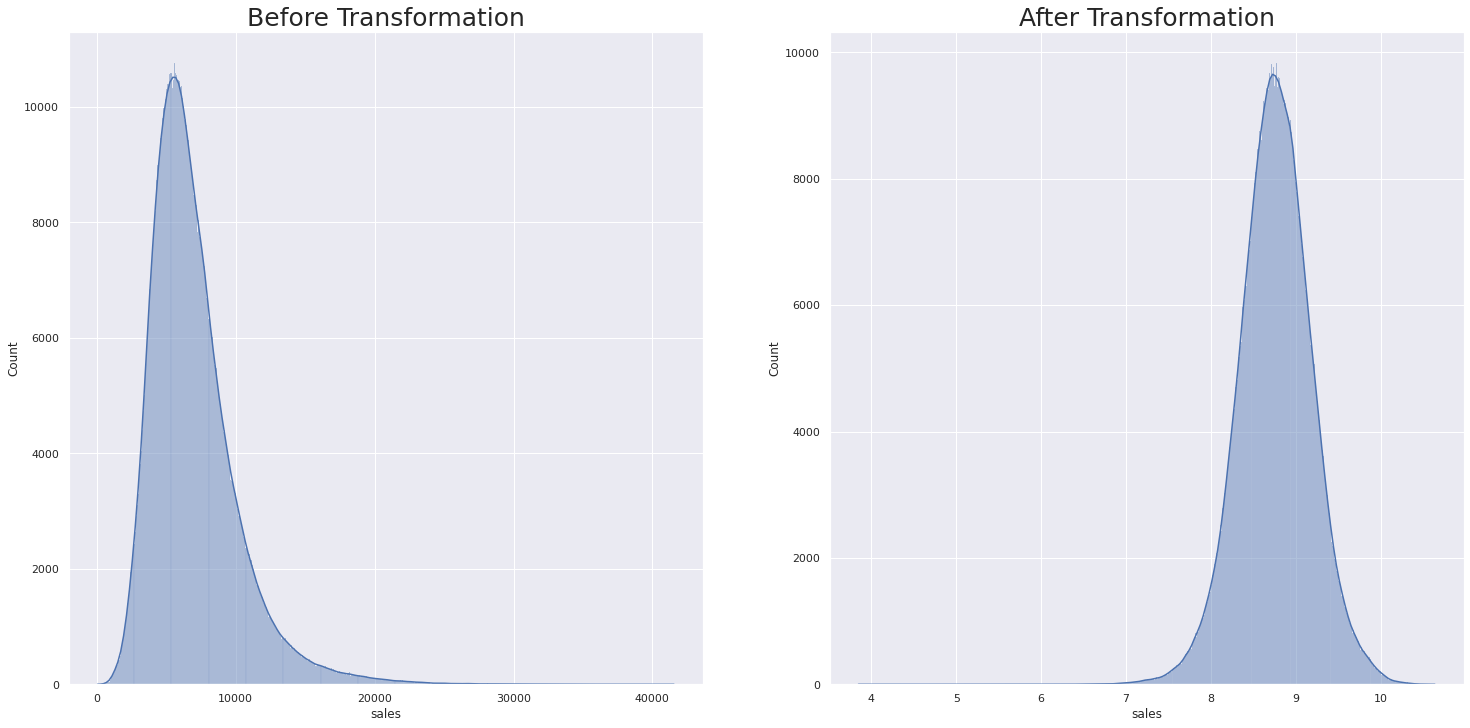

In [112]:
# sales plot before log
plt.subplot(1,2,1)
sns.histplot(x = 'sales', data = df5, kde = True);
plt.title('Before Transformation', fontsize = 25);

# sales plot after log
plt.subplot(1,2,2)
sns.histplot(np.log1p(df5['sales']), kde = True);
plt.title("After Transformation", fontsize = 25);

#logarithmic transformation
df5['sales'] = np.log1p(df5['sales'])

In [113]:
#month 
df5['month_sin'] = df5['month'].apply(lambda x: np.sin(x * (2* np.pi/12) ))
df5['month_cos'] = df5['month'].apply(lambda x: np.cos(x * (2* np.pi/12) ))

#day
df5['day_sin'] = df5['day'].apply(lambda x: np.sin(x * (2* np.pi/30) ))
df5['day_cos'] = df5['day'].apply(lambda x: np.cos(x * (2* np.pi/30) ))

#week_of_year
df5['week_of_year_sin'] = df5['week_of_year'].apply(lambda x: np.sin(x * (2* np.pi/52) ))
df5['week_of_year_cos'] = df5['week_of_year'].apply(lambda x: np.cos(x * (2* np.pi/52) ))

#day_of_week
df5['day_of_week_sin'] = df5['day_of_week'].apply(lambda x: np.sin(x * (2* np.pi/7) ))
df5['day_of_week_cos'] = df5['day_of_week'].apply(lambda x: np.cos(x * (2* np.pi/7) ))

<h1><b>Feature Selection

Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in. Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

In [114]:
df6 = df5.copy()

In [115]:
# drop columns used to contruct other variables
cols_drop = ['month','week_of_year','day','day_of_week','promo_since','competition_since','year_week']
df6 = df6.drop(cols_drop,axis = 1)

<h1><b>Split dataframe into training and test dataset</b>

The project's objective is to predict sales for the next 6 weeks. Thus, the test data will be the last 6 weeks of the entire dataset and the train data will be the rest.

In [116]:
# getting data to split
df6['date'].max() - datetime.timedelta(days = 7*6)

Timestamp('2015-06-19 00:00:00')

In [117]:
#training dataset
X_train = df6[df6['date'] < '2015-06-19']
y_train = X_train['sales']

#test dataset
X_test = df6[df6['date'] >= '2015-06-19']
y_test = X_test['sales']

print("Training min date: {}".format(X_train['date'].min()))
print("Training max date: {}".format(X_train['date'].max()))

print("\nTest Min date: {}".format(X_test['date'].min()))
print("Test Max Date: {}".format(X_test['date'].max()))

Training min date: 2013-01-01 00:00:00
Training max date: 2015-06-18 00:00:00

Test Min date: 2015-06-19 00:00:00
Test Max Date: 2015-07-31 00:00:00


<h1><b>Linear Regression</b>